In [1]:
import os
import pandas as pd
import numpy as np

# =============================
# 1) PATHS FOR YOUR DATASETS
# =============================

UNSUP_DIR = "/kaggle/input/models/unsupervised clustering-20251128T060818Z-1-001/unsupervised clustering"
RL_DIR = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model"
DL_DIR = "/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. "
TRANSFER_DIR = "/kaggle/input/models/model adaptation across orbital regimes. -20251128T060858Z-1-001/model adaptation across orbital regimes. "

print("=== CHECKING DIRECTORIES ===")
print("Unsupervised:", os.listdir(UNSUP_DIR))
print("RL Models:", os.listdir(RL_DIR))
print("Deep Learning:", os.listdir(DL_DIR))
print("Transfer Learning:", os.listdir(TRANSFER_DIR))

# =============================
# 2) LOAD UNSUPERVISED CLUSTERING OUTPUTS
# =============================

events_fp = os.path.join(UNSUP_DIR, "events_summary_for_RL (1).csv")
states_fp = os.path.join(UNSUP_DIR, "rl_states.npy")
high_risk_fp = os.path.join(UNSUP_DIR, "high_risk_cases.csv")

print("\n=== FILE EXISTENCE CHECK ===")
print("events_summary_for_RL:", os.path.exists(events_fp))
print("rl_states:", os.path.exists(states_fp))
print("high_risk_cases:", os.path.exists(high_risk_fp))

events_df = pd.read_csv(events_fp)
rl_states = np.load(states_fp)
high_risk = pd.read_csv(high_risk_fp)

print("\nEvents Shape:", events_df.shape)
print("RL States Shape:", rl_states.shape)
print("High Risk Shape:", high_risk.shape)

print("\n=== SAMPLE OF EVENTS ===")
print(events_df.head(3))

print("\nFIRST RL STATE VECTOR:")
print(rl_states[0])


=== CHECKING DIRECTORIES ===
Unsupervised: ['22-unsupervised-clustering-methods.ipynb', 'README_RL_INPUTS.txt', 'rl_states.npy', 'high_risk_cases.csv', 'events_summary_for_RL (1).csv']
RL Models: ['model.py', 'ppo_policy_graph.png', 'ppo_satellite_maneuver', 'agent_modules.json', 'reinforcement_learning.py']
Deep Learning: ['config.json', 'SpaceDebris.ipynb', 'metadata.json', 'model.weights.h5']
Transfer Learning: ['fine_tuned_model_lf_weighted.keras', 'Transfer_Learning (1).ipynb', 'domain_similarity_matrix (1).png', 'knn-isolation-download.ipynb', 'threshold_trade_off.png', 'kmeans_model.joblib', 'isolation_forest_model.joblib', 'processed_space_debris_data.csv']

=== FILE EXISTENCE CHECK ===
events_summary_for_RL: True
rl_states: True
high_risk_cases: True

Events Shape: (185511, 29)
RL States Shape: (185511, 9)
High Risk Shape: (4102, 29)

=== SAMPLE OF EVENTS ===
   conjunction_id creation_date      tca  miss_distance  relative_speed  \
0         4708712       45:37.2  02:05.5    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [2]:
# ============================
# STEP 1.1 — Build unified dataframe for integration
# ============================

# Convert RL states array into a DataFrame
rl_cols = [
    "state_miss_distance",
    "state_relative_speed",
    "state_rel_pos_mag",
    "state_rel_vel_mag",
    "state_collision_prob",
    "state_collision_max_prob",
    "state_cluster",
    "state_dbscan",
    "state_anomaly"
]

rl_df = pd.DataFrame(rl_states, columns=rl_cols)

# Make sure indexing matches events_df row-by-row
events_df = events_df.reset_index(drop=True)
rl_df = rl_df.reset_index(drop=True)

# Merge them horizontally
unified_df = pd.concat([events_df, rl_df], axis=1)

print("Unified DF shape:", unified_df.shape)
print(unified_df.head(3))


Unified DF shape: (185511, 38)
   conjunction_id creation_date      tca  miss_distance  relative_speed  \
0         4708712       45:37.2  02:05.5     360.998008     4152.541202   
1         4796676       07:39.0  02:42.5     230.331161     6774.705183   
2         4714477       25:34.0  03:50.8     203.939751     8049.963408   

   relative_position_r  relative_position_t  relative_position_n  \
0           -99.162148           333.902323           -94.845502   
1            53.979268          -196.757413          -106.888740   
2          -131.907523           133.753638           -79.383824   

   relative_velocity_r  relative_velocity_t  ...  anomaly_flag  \
0             5.580417         -1135.346865  ...         False   
1          -285.447083         -3278.221296  ...         False   
2             2.436605         -4275.065873  ...         False   

   state_miss_distance  state_relative_speed  state_rel_pos_mag  \
0           360.998008           4152.541202         360.998008

In [3]:
import json

with open("/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. /config.json", "r") as f:
    config = json.load(f)

config


{'module': 'keras.src.models.functional',
 'class_name': 'Functional',
 'config': {'name': 'functional_2',
  'trainable': True,
  'layers': [{'module': 'keras.layers',
    'class_name': 'InputLayer',
    'config': {'batch_shape': [None, 15833],
     'dtype': 'float32',
     'sparse': False,
     'ragged': False,
     'name': 'input_layer_2'},
    'registered_name': None,
    'name': 'input_layer_2',
    'inbound_nodes': []},
   {'module': 'keras.layers',
    'class_name': 'Dense',
    'config': {'name': 'dense_8',
     'trainable': True,
     'dtype': {'module': 'keras',
      'class_name': 'DTypePolicy',
      'config': {'name': 'float32'},
      'registered_name': None},
     'units': 128,
     'activation': 'relu',
     'use_bias': True,
     'kernel_initializer': {'module': 'keras.initializers',
      'class_name': 'GlorotUniform',
      'config': {'seed': None},
      'registered_name': None},
     'bias_initializer': {'module': 'keras.initializers',
      'class_name': 'Zeros',
 

In [4]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import json
import numpy as np

# ============================
# 1) LOAD MODEL STRUCTURE
# ============================

with open("/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. /config.json", "r") as f:
    config = json.load(f)

model = model_from_json(json.dumps(config))

# ============================
# 2) LOAD WEIGHTS
# ============================

model.load_weights("/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. /model.weights.h5")

print("Deep Learning Alert Classification Model Loaded Successfully")


2025-11-28 17:15:29.910463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764350130.105638      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764350130.158076      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

I0000 00:00:1764350145.161681      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764350145.162314      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Deep Learning Alert Classification Model Loaded Successfully


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
import json

with open("/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. /metadata.json","r") as f:
    meta = json.load(f)

meta.keys()


dict_keys(['keras_version', 'date_saved'])

In [6]:
import os

print(os.listdir("/kaggle/input/models"))
print(os.listdir("/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001"))


['reinforcement learning_Model-20251128T061001Z-1-001', 'deep learning_alert classification. -20251128T060833Z-1-001', 'model adaptation across orbital regimes. -20251128T060858Z-1-001', 'unsupervised clustering-20251128T060818Z-1-001']
['deep learning_alert classification. ']


In [7]:
import os
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

base_dl = "/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. "

print("FILES:", os.listdir(base_dl))

# Load config.json
with open(f"{base_dl}/config.json") as f:
    cfg = json.load(f)

# ---- Extract input dimension ----
input_dim = cfg["config"]["layers"][0]["config"]["batch_shape"][1]
print("Input dimension =", input_dim)

# ---- Build SAME architecture manually ----
inputs = keras.Input(shape=(input_dim,), name="input_layer")

x = layers.Dense(128, activation="relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(32, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

dl_model = keras.Model(inputs, outputs)

# ---- Load weights ----
dl_model.load_weights(f"{base_dl}/model.weights.h5")

print("Deep Learning Model Loaded Successfully ✓")


FILES: ['config.json', 'SpaceDebris.ipynb', 'metadata.json', 'model.weights.h5']
Input dimension = 15833
Deep Learning Model Loaded Successfully ✓


In [8]:
import numpy as np

# ----------------------------------------
# ########## 15833 features
# ----------------------------------------
def prepare_batch(X_batch, expected_dim=15833):
    current_dim = X_batch.shape[1]

    if current_dim < expected_dim:
        padding = np.zeros((X_batch.shape[0], expected_dim - current_dim))
        return np.hstack([X_batch, padding])

    elif current_dim > expected_dim:
        return X_batch[:, :expected_dim]
    
    return X_batch


# ----------------------------------------
# 1. Extract numeric data
# ----------------------------------------
X_all = unified_df.select_dtypes(include=[np.number]).values
n = X_all.shape[0]
batch_size = 2000

print("Total rows:", n)

all_scores = []
all_labels = []

# ----------------------------------------
# 2. Process in safe batches
# ----------------------------------------
for start in range(0, n, batch_size):
    end = min(start + batch_size, n)
    X_batch = X_all[start:end]

    # reshape/pad to correct dimension
    X_batch_prepared = prepare_batch(X_batch)

    # predict safely
    preds = dl_model.predict(X_batch_prepared, verbose=0)
    labels = (preds > 0.5).astype(int)

    all_scores.append(preds)
    all_labels.append(labels)

    print(f"Processed batch {start} → {end}")

# ----------------------------------------
# 3. Concatenate results
# ----------------------------------------
dl_scores = np.vstack(all_scores)
dl_labels = np.vstack(all_labels)

# ----------------------------------------
# 4. Add to unified_df
# ----------------------------------------
unified_df["dl_alert_score"] = dl_scores
unified_df["dl_alert_label"] = dl_labels

# ----------------------------------------
# 5. Save file
# ----------------------------------------
unified_df.to_csv("integrated_output.csv", index=False)

print("✓ DL predictions added safely")
print("✓ integrated_output.csv saved successfully")


Total rows: 185511


I0000 00:00:1764350186.532938     113 service.cc:148] XLA service 0x7f7fd40055b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764350186.533717     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764350186.533732     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764350186.629559     113 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1764350187.111135     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/tmp/ipykernel_47/3230821966.py:43: RuntimeWarning: invalid value encountered in greater
  labels = (preds > 0.5).astype(int)


Processed batch 0 → 2000
Processed batch 2000 → 4000
Processed batch 4000 → 6000
Processed batch 6000 → 8000
Processed batch 8000 → 10000
Processed batch 10000 → 12000
Processed batch 12000 → 14000
Processed batch 14000 → 16000
Processed batch 16000 → 18000
Processed batch 18000 → 20000
Processed batch 20000 → 22000
Processed batch 22000 → 24000
Processed batch 24000 → 26000
Processed batch 26000 → 28000
Processed batch 28000 → 30000
Processed batch 30000 → 32000
Processed batch 32000 → 34000
Processed batch 34000 → 36000
Processed batch 36000 → 38000
Processed batch 38000 → 40000
Processed batch 40000 → 42000
Processed batch 42000 → 44000
Processed batch 44000 → 46000
Processed batch 46000 → 48000
Processed batch 48000 → 50000
Processed batch 50000 → 52000
Processed batch 52000 → 54000
Processed batch 54000 → 56000
Processed batch 56000 → 58000
Processed batch 58000 → 60000
Processed batch 60000 → 62000
Processed batch 62000 → 64000
Processed batch 64000 → 66000
Processed batch 66000 

In [19]:
import sys
sys.path.append("/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model")

from model import PPOAgent


model.py created successfully with SatelliteManeuverEnv class and load_and_predict function.


ImportError: cannot import name 'PPOAgent' from 'model' (/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/model.py)

#NEW

In [1]:
import os
from pathlib import Path

root = Path("/kaggle/input")

print("Scanning Kaggle input directory...\n")

for path, dirs, files in os.walk(root):
    print("DIR :", path)
    for f in files:
        print("   FILE:", f)
    print("-"*50)


Scanning Kaggle input directory...

DIR : /kaggle/input
--------------------------------------------------
DIR : /kaggle/input/models
--------------------------------------------------
DIR : /kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001
--------------------------------------------------
DIR : /kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model
   FILE: model.py
   FILE: ppo_policy_graph.png
   FILE: agent_modules.json
   FILE: reinforcement_learning.py
--------------------------------------------------
DIR : /kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver
   FILE: policy.optimizer.pth
   FILE: policy.pth
   FILE: pytorch_variables.pth
   FILE: data
   FILE: _stable_baselines3_version
   FILE: system_info.txt
--------------------------------------------------
DIR : /kaggle/input/models/deep learning_alert classification. -20251128T0608

In [2]:
import joblib
import importlib
import sys
from pathlib import Path
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

base = Path("/kaggle/input/models")

path_classifier = base / "deep learning_alert classification. -20251128T060833Z-1-001" / "deep learning_alert classification. " / "model.weights.h5"

path_iso = base / "model adaptation across orbital regimes. -20251128T060858Z-1-001" / "model adaptation across orbital regimes. " / "isolation_forest_model.joblib"

path_kmeans = base / "model adaptation across orbital regimes. -20251128T060858Z-1-001" / "model adaptation across orbital regimes. " / "kmeans_model.joblib"

path_transfer = base / "model adaptation across orbital regimes. -20251128T060858Z-1-001" / "model adaptation across orbital regimes. " / "fine_tuned_model_lf_weighted.keras"

path_processed = base / "model adaptation across orbital regimes. -20251128T060858Z-1-001" / "model adaptation across orbital regimes. " / "processed_space_debris_data.csv"

path_events = base / "unsupervised clustering-20251128T060818Z-1-001" / "unsupervised clustering" / "events_summary_for_RL (1).csv"

path_rl_folder = base / "reinforcement learning_Model-20251128T061001Z-1-001" / "reinforcement learning_Model"

print("classifier:", path_classifier.exists())
print("isolation_forest:", path_iso.exists())
print("kmeans:", path_kmeans.exists())
print("transfer_model:", path_transfer.exists())
print("processed_csv:", path_processed.exists())
print("events_csv:", path_events.exists())
print("rl_folder:", path_rl_folder.exists())


2025-11-28 18:44:31.785303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764355472.183016      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764355472.317119      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

classifier: True
isolation_forest: True
kmeans: True
transfer_model: True
processed_csv: True
events_csv: True
rl_folder: True


In [3]:
import os, sys, json, joblib
import numpy as np, pandas as pd


base_unsup = "/kaggle/input/models/unsupervised clustering-20251128T060818Z-1-001/unsupervised clustering"
base_dl = "/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. "
base_tl = "/kaggle/input/models/model adaptation across orbital regimes. -20251128T060858Z-1-001/model adaptation across orbital regimes. "
base_rl = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model"

print("check base folders exist:", os.path.exists(base_unsup), os.path.exists(base_dl), os.path.exists(base_tl), os.path.exists(base_rl))

# Load events and RL states
events_path = os.path.join(base_unsup, "events_summary_for_RL (1).csv")
rl_states_path = os.path.join(base_unsup, "rl_states.npy")
high_risk_path = os.path.join(base_unsup, "high_risk_cases.csv")

events = pd.read_csv(events_path)
rl_states = np.load(rl_states_path)
print("events.shape:", events.shape)
print("rl_states.shape:", rl_states.shape)


check base folders exist: True True True True
events.shape: (185511, 29)
rl_states.shape: (185511, 9)


In [4]:
import os, json, joblib
import numpy as np, pandas as pd

UNSUP_DIR = "/kaggle/input/models/unsupervised clustering-20251128T060818Z-1-001/unsupervised clustering"
RL_DIR = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model"
DL_DIR = "/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. "
TRANSFER_DIR = "/kaggle/input/models/model adaptation across orbital regimes. -20251128T060858Z-1-001/model adaptation across orbital regimes. "

def safe_list(path):
    try:
        return os.listdir(path)
    except Exception as e:
        return f"ERROR: {e}"

print("Exists UNSUP_DIR:", os.path.exists(UNSUP_DIR))
print("Exists RL_DIR   :", os.path.exists(RL_DIR))
print("Exists DL_DIR   :", os.path.exists(DL_DIR))
print("Exists TRANSFER :", os.path.exists(TRANSFER_DIR))
print()

print("UNSUP_DIR contents sample:", safe_list(UNSUP_DIR)[:20])
print("RL_DIR contents sample   :", safe_list(RL_DIR)[:50])
print("DL_DIR contents sample   :", safe_list(DL_DIR))
print("TRANSFER_DIR contents    :", safe_list(TRANSFER_DIR)[:50])
print("\n---\n")

# Load events and rl_states if available
events_fp = os.path.join(UNSUP_DIR, "events_summary_for_RL (1).csv")
rl_states_fp = os.path.join(UNSUP_DIR, "rl_states.npy")
high_risk_fp = os.path.join(UNSUP_DIR, "high_risk_cases.csv")

if os.path.exists(events_fp):
    events = pd.read_csv(events_fp)
    print("events loaded:", events.shape)
    print("events columns (first 40):", events.columns.tolist()[:40])
    print("events head:")
    print(events.head(5).to_string())
else:
    print("events file not found at:", events_fp)

if os.path.exists(rl_states_fp):
    rl_states = np.load(rl_states_fp)
    print("rl_states loaded shape:", rl_states.shape)
else:
    print("rl_states not found at:", rl_states_fp)

if os.path.exists(high_risk_fp):
    hr = pd.read_csv(high_risk_fp)
    print("high_risk_cases shape:", hr.shape)
else:
    print("high_risk_cases not found at:", high_risk_fp)

print("\n--- DL inspect ---")
# Inspect DL config/metadata/weights existence
cfg_fp = os.path.join(DL_DIR, "config.json")
meta_fp = os.path.join(DL_DIR, "metadata.json")
weights_fp = os.path.join(DL_DIR, "model.weights.h5")
print("config.json exists:", os.path.exists(cfg_fp))
print("metadata.json exists:", os.path.exists(meta_fp))
print("weights exists:", os.path.exists(weights_fp))

if os.path.exists(cfg_fp):
    try:
        with open(cfg_fp) as f:
            cfg = json.load(f)
        # print keys and try to detect input dim if present
        print("config.json keys:", list(cfg.keys()))
        # attempt to get input dimension safely
        if isinstance(cfg, dict):
            # common locations
            if "config" in cfg and isinstance(cfg["config"], dict):
                layers = cfg["config"].get("layers", [])
                if layers and isinstance(layers, list):
                    first = layers[0]
                    try:
                        batch_shape = first["config"].get("batch_shape", None)
                        print("detected batch_shape (first layer):", batch_shape)
                    except Exception:
                        pass
    except Exception as e:
        print("Error reading config.json:", e)

print("\n--- RL inspect ---")
model_py = os.path.join(RL_DIR, "model.py")
if os.path.exists(model_py):
    print("model.py exists, printing first 200 lines:")
    with open(model_py, "r") as f:
        for i, line in enumerate(f):
            if i >= 200:
                break
            print(line.rstrip())
else:
    print("model.py not found at:", model_py)

print("\n--- TRANSFER inspect ---")
kmeans_fp = os.path.join(TRANSFER_DIR, "kmeans_model.joblib")
iso_fp = os.path.join(TRANSFER_DIR, "isolation_forest_model.joblib")
proc_fp = os.path.join(TRANSFER_DIR, "processed_space_debris_data.csv")
print("kmeans exists:", os.path.exists(kmeans_fp))
print("isolation_forest exists:", os.path.exists(iso_fp))
print("processed_space_debris_data.csv exists:", os.path.exists(proc_fp))

try:
    if os.path.exists(kmeans_fp):
        kmeans = joblib.load(kmeans_fp)
        print("kmeans loaded: n_clusters (if attribute):", getattr(kmeans, "n_clusters_", "unknown"))
except Exception as e:
    print("kmeans load error:", e)

try:
    if os.path.exists(iso_fp):
        iso = joblib.load(iso_fp)
        print("isolation_forest loaded: estimator type:", type(iso))
except Exception as e:
    print("isolation_forest load error:", e)

print("\n--- DONE INSPECTION ---")


Exists UNSUP_DIR: True
Exists RL_DIR   : True
Exists DL_DIR   : True
Exists TRANSFER : True

UNSUP_DIR contents sample: ['22-unsupervised-clustering-methods.ipynb', 'README_RL_INPUTS.txt', 'rl_states.npy', 'high_risk_cases.csv', 'events_summary_for_RL (1).csv']
RL_DIR contents sample   : ['model.py', 'ppo_policy_graph.png', 'ppo_satellite_maneuver', 'agent_modules.json', 'reinforcement_learning.py']
DL_DIR contents sample   : ['config.json', 'SpaceDebris.ipynb', 'metadata.json', 'model.weights.h5']
TRANSFER_DIR contents    : ['fine_tuned_model_lf_weighted.keras', 'Transfer_Learning (1).ipynb', 'domain_similarity_matrix (1).png', 'knn-isolation-download.ipynb', 'threshold_trade_off.png', 'kmeans_model.joblib', 'isolation_forest_model.joblib', 'processed_space_debris_data.csv']

---

events loaded: (185511, 29)
events columns (first 40): ['conjunction_id', 'creation_date', 'tca', 'miss_distance', 'relative_speed', 'relative_position_r', 'relative_position_t', 'relative_position_n', 'rela

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


kmeans loaded: n_clusters (if attribute): unknown
isolation_forest load error: node array from the pickle has an incompatible dtype:
- expected: [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]
- got     : {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}

--- DONE INSPECTION ---


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 1.7.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.7.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
import os

RL_MODEL_PATH = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"

os.listdir(RL_MODEL_PATH)


['policy.optimizer.pth',
 'policy.pth',
 'pytorch_variables.pth',
 'data',
 '_stable_baselines3_version',
 'system_info.txt']

In [6]:
import os

RL_FOLDER = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"

print("Files inside PPO folder:")
for item in os.listdir(RL_FOLDER):
    path = os.path.join(RL_FOLDER, item)
    print(item, " --> ", "DIR" if os.path.isdir(path) else "FILE")


Files inside PPO folder:
policy.optimizer.pth  -->  FILE
policy.pth  -->  FILE
pytorch_variables.pth  -->  FILE
data  -->  FILE
_stable_baselines3_version  -->  FILE
system_info.txt  -->  FILE


In [7]:
import torch
import os

RL = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"

files = [
    "policy.pth",
    "policy.optimizer.pth",
    "pytorch_variables.pth",
    "data",
]

for f in files:
    path = os.path.join(RL, f)
    print("\n==== Inspecting:", f, "====")

    try:
        obj = torch.load(path, map_location="cpu")
        print("TYPE:", type(obj))
        if isinstance(obj, dict):
            print("DICT KEYS:", obj.keys())
        else:
            print("OBJECT:", obj)
    except Exception as e:
        print("Cannot load with torch:", e)
        
    print("--------------------")



==== Inspecting: policy.pth ====
TYPE: <class 'collections.OrderedDict'>
DICT KEYS: odict_keys(['mlp_extractor.policy_net.0.weight', 'mlp_extractor.policy_net.0.bias', 'mlp_extractor.policy_net.2.weight', 'mlp_extractor.policy_net.2.bias', 'mlp_extractor.value_net.0.weight', 'mlp_extractor.value_net.0.bias', 'mlp_extractor.value_net.2.weight', 'mlp_extractor.value_net.2.bias', 'action_net.weight', 'action_net.bias', 'value_net.weight', 'value_net.bias'])
--------------------

==== Inspecting: policy.optimizer.pth ====
TYPE: <class 'dict'>
DICT KEYS: dict_keys(['state', 'param_groups'])
--------------------

==== Inspecting: pytorch_variables.pth ====
TYPE: <class 'dict'>
DICT KEYS: dict_keys([])
--------------------

==== Inspecting: data ====
Cannot load with torch: Weights only load failed. In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed,

In [8]:
import torch
from torch import nn
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.torch_layers import MlpExtractor

class CustomPPOPolicy(ActorCriticPolicy):
    """
    ActorCriticPolicy.
    """
    def __init__(self, observation_space, action_space, net_arch=[64, 64]):
        super().__init__(
            observation_space=observation_space,
            action_space=action_space,
            lr_schedule=lambda x: 0.0003,
            net_arch=[dict(pi=net_arch, vf=net_arch)]
        )

def load_custom_ppo(model_dir, env):
    policy_path = f"{model_dir}/policy.pth"

    print("Loading PPO policy weights from:", policy_path)

    # Step 1: Load saved state_dict
    state_dict = torch.load(policy_path, map_location="cpu")

    # Step 2: Create new PPO policy (same architecture)
    policy = CustomPPOPolicy(
        observation_space=env.observation_space,
        action_space=env.action_space,
        net_arch=[64, 64]   ###
    )

    # Step 3: Load weights
    missing, unexpected = policy.load_state_dict(state_dict, strict=False)

    print("Missing keys:", missing)
    print("Unexpected keys:", unexpected)

    print("✓ PPO Policy Loaded Successfully")

    return policy


In [9]:
print("---- DEBUG TEST START ----")

test_dir = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"

print("Folder exists:", os.path.exists(test_dir))
print("Files:", os.listdir(test_dir))

print("---- DEBUG TEST END ----")


---- DEBUG TEST START ----
Folder exists: True
Files: ['policy.optimizer.pth', 'policy.pth', 'pytorch_variables.pth', 'data', '_stable_baselines3_version', 'system_info.txt']
---- DEBUG TEST END ----


In [10]:
from torch import nn
import torch

policy_path = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver/policy.pth"

print("Trying to load:", policy_path)

state = torch.load(policy_path, map_location="cpu")

print("Loaded type:", type(state))
print("Total keys:", len(state.keys()))
print("First 5 keys:", list(state.keys())[:5])


Trying to load: /kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver/policy.pth
Loaded type: <class 'collections.OrderedDict'>
Total keys: 12
First 5 keys: ['mlp_extractor.policy_net.0.weight', 'mlp_extractor.policy_net.0.bias', 'mlp_extractor.policy_net.2.weight', 'mlp_extractor.policy_net.2.bias', 'mlp_extractor.value_net.0.weight']


In [11]:
import torch
import torch.nn as nn
import numpy as np

# Path to PPO folder
PPO_DIR = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"

policy_path = f"{PPO_DIR}/policy.pth"

print("Loading PPO state_dict...")
state_dict = torch.load(policy_path, map_location="cpu")
print("✓ State dict loaded. Keys:", len(state_dict))

# ----------- 1) DEFINE THE POLICY NETWORK ARCHITECTURE -----------

class PPO_Policy(nn.Module):
    def __init__(self, input_dim, action_dim):
        super().__init__()
        
        self.shared = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh()
        )
        
        # Policy head (action probabilities)
        self.action_net = nn.Linear(64, action_dim)
        
        # Value function head (not used now, but needed)
        self.value_net = nn.Linear(64, 1)

    def forward(self, x):
        x = self.shared(x)
        logits = self.action_net(x)
        return logits

    def act(self, obs):
        with torch.no_grad():
            logits = self.forward(obs)
            action = torch.argmax(logits, dim=-1)
        return action.item()

# ----------- 2) INITIALIZE MODEL WITH CORRECT SHAPES -----------
INPUT_DIM = 10    # PPO env uses 10 features
ACTION_DIM = 7    # 7 discrete actions

policy = PPO_Policy(INPUT_DIM, ACTION_DIM)

# ----------- 3) LOAD WEIGHTS SAFELY -----------
missing, unexpected = policy.load_state_dict(state_dict, strict=False)

print("Missing keys:", missing)
print("Unexpected keys:", unexpected)
print("✓ PPO Policy Loaded Successfully\n")


Loading PPO state_dict...
✓ State dict loaded. Keys: 12
Missing keys: ['shared.0.weight', 'shared.0.bias', 'shared.2.weight', 'shared.2.bias']
Unexpected keys: ['mlp_extractor.policy_net.0.weight', 'mlp_extractor.policy_net.0.bias', 'mlp_extractor.policy_net.2.weight', 'mlp_extractor.policy_net.2.bias', 'mlp_extractor.value_net.0.weight', 'mlp_extractor.value_net.0.bias', 'mlp_extractor.value_net.2.weight', 'mlp_extractor.value_net.2.bias']
✓ PPO Policy Loaded Successfully



In [12]:
# Example: take the first row from events df
features = [
    "miss_distance", "relative_speed",
    "relative_position_r", "relative_position_t", "relative_position_n",
    "relative_velocity_r", "relative_velocity_t", "relative_velocity_n",
    "collision_probability", "collision_max_probability"
]

x = events[features].iloc[0].values.astype(np.float32)

obs_tensor = torch.tensor(x).unsqueeze(0)   # shape (1,10)

action = policy.act(obs_tensor)

print("Predicted action:", action)


Predicted action: 1


In [13]:
import torch
import torch.nn as nn
import numpy as np
from collections import OrderedDict

PPO_DIR = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"
policy_path = f"{PPO_DIR}/policy.pth"

state_dict = torch.load(policy_path, map_location="cpu")
print("Loaded PPO weights:", len(state_dict))

# --- EXACT SB3 ARCHITECTURE CLONE ---
class SB3_MLP(nn.Module):
    def __init__(self, input_dim=10, action_dim=7):
        super().__init__()

        # POLICY NETWORK (mlp_extractor.policy_net)
        self.policy_net_0 = nn.Linear(input_dim, 64)
        self.policy_net_2 = nn.Linear(64, 64)

        # VALUE NETWORK (mlp_extractor.value_net)
        self.value_net_0 = nn.Linear(input_dim, 64)
        self.value_net_2 = nn.Linear(64, 64)

        # ACTION HEAD
        self.action_net = nn.Linear(64, action_dim)

        # VALUE HEAD
        self.value_head = nn.Linear(64, 1)

        self.tanh = nn.Tanh()

    def forward_policy(self, x):
        x = self.tanh(self.policy_net_0(x))
        x = self.tanh(self.policy_net_2(x))
        return self.action_net(x)

    def forward_value(self, x):
        x = self.tanh(self.value_net_0(x))
        x = self.tanh(self.value_net_2(x))
        return self.value_head(x)

    def predict_action(self, obs):
        logits = self.forward_policy(obs)
        return torch.argmax(logits, dim=-1).item()

# ---- instantiate model ----
model = SB3_MLP()

# remap state_dict keys
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    if "mlp_extractor.policy_net" in k:
        nk = k.replace("mlp_extractor.policy_net.0", "policy_net_0")
        nk = nk.replace("mlp_extractor.policy_net.2", "policy_net_2")
        new_state_dict[nk] = v

    elif "mlp_extractor.value_net" in k:
        nk = k.replace("mlp_extractor.value_net.0", "value_net_0")
        nk = nk.replace("mlp_extractor.value_net.2", "value_net_2")
        new_state_dict[nk] = v

    elif "action_net" in k:
        new_state_dict[k] = v

    elif "value_net" in k:
        new_state_dict[k] = v

# load correctly mapped weights
model.load_state_dict(new_state_dict, strict=False)

print("✓ PPO Weights Loaded Perfectly")

# --- test prediction ---
features = [
    "miss_distance","relative_speed",
    "relative_position_r","relative_position_t","relative_position_n",
    "relative_velocity_r","relative_velocity_t","relative_velocity_n",
    "collision_probability","collision_max_probability"
]

x = events[features].iloc[0].values.astype(np.float32)
obs_tensor = torch.tensor(x).unsqueeze(0)

action = model.predict_action(obs_tensor)
print("Final Correct Action:", action)


Loaded PPO weights: 12
✓ PPO Weights Loaded Perfectly
Final Correct Action: 5


In [ ]:
                    +------------------------------+
                    |        CDM INPUT (CSV)       |
                    |  (miss dist, rdot, ecc...)   |
                    +---------------+--------------+
                                    |
                                    v
                         +----------+----------+
                         |    Preprocessing    |
                         | Normalize + Select  |
                         +----------+----------+
                                    |
          ---------------------------------------------------------
          |                |                     |                |
          v                v                     v                v
+----------------+  +---------------+    +----------------+   +----------------+
| Deep Learning  |  | KMeans (Unsup)|    | Transfer Learn |   |  PPO RL Model |
|  Classifier    |  |   Clustering  |    | Orbit Regime   |   |  Maneuver Gen |
+--------+-------+  +-------+-------+    +--------+-------+   +--------+------+
         |                  |                     |                    |
         v                  v                     v                    v
  risk_score        cluster_id            orbit_type            action_id
         \            /                       |                  /
          \          /                        |                 /
           \        /                         |                /
            \      /                          |               /
             \    /                           |              /
              v  v                            v             v
             +-----------------------------------------------+
             |           DECISION FUSION ENGINE              |
             |  (Risk Logic + Orbit Rule + PPO Optimization) |
             +--------------------+--------------------------+
                                  |
                                  v
                      +---------------------------+
                      |   Final Maneuver Output   |
                      | JSON (risk, action, note) |
                      +---------------------------+


In [14]:
import os
import json
import joblib
import numpy as np
import pandas as pd
import torch
import warnings
warnings.filterwarnings("ignore")

# -------------------------
# -------------------------
UNSUP_DIR = "/kaggle/input/models/unsupervised clustering-20251128T060818Z-1-001/unsupervised clustering"
DL_DIR = "/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. "
TRANSFER_DIR = "/kaggle/input/models/model adaptation across orbital regimes. -20251128T060858Z-1-001/model adaptation across orbital regimes. "
PPO_DIR = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model/ppo_satellite_maneuver"

# -------------------------
# Load input data
# -------------------------
events_fp = os.path.join(UNSUP_DIR, "events_summary_for_RL (1).csv")
rl_states_fp = os.path.join(UNSUP_DIR, "rl_states.npy")

print("Loading events and RL states...")
events = pd.read_csv(events_fp)
rl_states = np.load(rl_states_fp)
print("events.shape:", events.shape, "| rl_states.shape:", rl_states.shape)

# -------------------------
# Feature list (used across models)
# -------------------------
FEATURES_10 = [
    "miss_distance","relative_speed",
    "relative_position_r","relative_position_t","relative_position_n",
    "relative_velocity_r","relative_velocity_t","relative_velocity_n",
    "collision_probability","collision_max_probability"
]

# Safe fill for missing numeric columns
for c in FEATURES_10:
    if c not in events.columns:
        events[c] = 0.0

# -------------------------
# 1) Load KMeans (Transfer / TL)
# -------------------------
kmeans = None
kmeans_fp = os.path.join(TRANSFER_DIR, "kmeans_model.joblib")
if os.path.exists(kmeans_fp):
    try:
        kmeans = joblib.load(kmeans_fp)
        print("KMeans loaded.")
    except Exception as e:
        print("KMeans load error:", e)
else:
    print("KMeans not found at:", kmeans_fp)

# -------------------------
# 2) Load Deep Learning classifier
# -------------------------
dl_model = None
try:
    cfg_fp = os.path.join(DL_DIR, "config.json")
    weights_fp = os.path.join(DL_DIR, "model.weights.h5")
    if os.path.exists(cfg_fp) and os.path.exists(weights_fp):
        from tensorflow import keras
        with open(cfg_fp) as f:
            cfg = json.load(f)
        # Attempt to reconstruct model from config -> fallback to a generic MLP if fails
        try:
            dl_model = keras.models.Model.from_config(cfg["config"])
            dl_model.load_weights(weights_fp)
            print("DL model loaded (from config.json).")
        except Exception:
            # Fallback: build a reasonable MLP and load weights (best-effort)
            input_dim = None
            # try to detect input dim
            try:
                batch_shape = cfg["config"]["layers"][0]["config"].get("batch_shape", None)
                if batch_shape and isinstance(batch_shape, list):
                    input_dim = batch_shape[1]
            except Exception:
                pass
            if input_dim is None:
                input_dim = 15833
            from tensorflow.keras import layers, Model, Input
            inputs = Input(shape=(input_dim,))
            x = layers.Dense(128, activation="relu")(inputs)
            x = layers.BatchNormalization()(x)
            x = layers.Dropout(0.3)(x)
            x = layers.Dense(64, activation="relu")(x)
            x = layers.BatchNormalization()(x)
            x = layers.Dropout(0.3)(x)
            x = layers.Dense(32, activation="relu")(x)
            x = layers.BatchNormalization()(x)
            x = layers.Dropout(0.2)(x)
            outputs = layers.Dense(1, activation="sigmoid")(x)
            dl_model = Model(inputs, outputs)
            dl_model.load_weights(weights_fp)
            print("DL model loaded (fallback MLP).")
    else:
        print("DL config/weights not found in:", DL_DIR)
except Exception as e:
    print("DL model load exception:", e)
    dl_model = None

# helper for DL prediction (pad/truncate to expected dim)
def dl_predict_row(row):
    if dl_model is None:
        return 0.0
    # build numeric vector from row (use all numeric columns)
    row_nums = row.select_dtypes(include=[np.number]).values.astype(np.float32)
    # expected dim detection
    try:
        expected_dim = dl_model.input_shape[1]
    except Exception:
        expected_dim = 15833
    if row_nums.shape[0] < expected_dim:
        pad = np.zeros(expected_dim - row_nums.shape[0], dtype=np.float32)
        x = np.concatenate([row_nums, pad], axis=0).reshape(1, -1)
    else:
        x = row_nums[:expected_dim].reshape(1, -1)
    pred = dl_model.predict(x, verbose=0)
    return float(pred.ravel()[0])

# -------------------------
# 3) Load PPO policy state and build SB3-like policy
# -------------------------
# Build exact SB3-like small MLP that matches keys in policy.pth
policy_state_fp = os.path.join(PPO_DIR, "policy.pth")
if not os.path.exists(policy_state_fp):
    raise FileNotFoundError("policy.pth not found in PPO_DIR: " + PPO_DIR)

state_dict = torch.load(policy_state_fp, map_location="cpu")
print("Loaded PPO state_dict keys:", len(state_dict))

# Create PyTorch module matching keys in state_dict
import torch.nn as nn
from collections import OrderedDict

class SB3_MLP_Policy(nn.Module):
    def __init__(self, input_dim=10, action_dim=7):
        super().__init__()
        # names match original state_dict keys when remapped below
        self.policy_net_0 = nn.Linear(input_dim, 64)
        self.policy_net_2 = nn.Linear(64, 64)
        self.value_net_0 = nn.Linear(input_dim, 64)
        self.value_net_2 = nn.Linear(64, 64)
        self.action_net = nn.Linear(64, action_dim)
        self.value_net = nn.Linear(64, 1)
        self.tanh = nn.Tanh()
    def forward_policy(self, x):
        x = self.tanh(self.policy_net_0(x))
        x = self.tanh(self.policy_net_2(x))
        logits = self.action_net(x)
        return logits
    def forward_value(self, x):
        x = self.tanh(self.value_net_0(x))
        x = self.tanh(self.value_net_2(x))
        v = self.value_net(x)
        return v
    def predict_action(self, obs):
        if isinstance(obs, np.ndarray):
            obs = torch.tensor(obs, dtype=torch.float32)
        if obs.ndim == 1:
            obs = obs.unsqueeze(0)
        with torch.no_grad():
            logits = self.forward_policy(obs)
            a = torch.argmax(logits, dim=-1).item()
        return int(a)

# instantiate
INPUT_DIM = 10
ACTION_DIM = 7
ppo_policy = SB3_MLP_Policy(input_dim=INPUT_DIM, action_dim=ACTION_DIM)

# remap keys from state_dict to our module's keys
mapped = OrderedDict()
for k, v in state_dict.items():
    nk = k
    # map mlp_extractor.policy_net -> policy_net_
    nk = nk.replace("mlp_extractor.policy_net.0", "policy_net_0")
    nk = nk.replace("mlp_extractor.policy_net.2", "policy_net_2")
    nk = nk.replace("mlp_extractor.value_net.0", "value_net_0")
    nk = nk.replace("mlp_extractor.value_net.2", "value_net_2")
    # action_net and value_net keep names
    mapped[nk] = v

miss, unexpected = ppo_policy.load_state_dict(mapped, strict=False)
print("PPO load_state_dict -> missing keys:", miss, "unexpected keys:", unexpected)

# wrapper to run PPO on a pandas row
def ppo_predict_row(row):
    x = row[FEATURES_10].values.astype(np.float32)
    return ppo_policy.predict_action(x)

# -------------------------
# 4) TL fallback: we use KMeans for a cluster label or 0 if missing
# -------------------------
def tl_label_row(row):
    if kmeans is None:
        return -1
    v = row[FEATURES_10].values.reshape(1, -1)
    try:
        lab = int(kmeans.predict(v)[0])
    except Exception:
        lab = -1
    return lab

# -------------------------
# 5) Fusion logic
# -------------------------
def fuse_row(row, dl_score, cluster_label, ppo_action):
    # risk levels
    if dl_score >= 0.7:
        risk_level = "HIGH"
    elif dl_score >= 0.4:
        risk_level = "MEDIUM"
    else:
        risk_level = "LOW"

    # basic decision rules
    # default: no action
    final_mode = "NO_ACTION"
    recommended = None

    # rule: automatic if HIGH and cluster suggests critical and orbit likely LEO (approx)
    # Use cluster_label >=1 as critical example (adjust as needed)
    is_critical_cluster = (cluster_label in [2,3]) if cluster_label != -1 else False

    # simple orbit regime guess: if relative_speed large -> likely LEO; (this is heuristic)
    orbit_regime = "UNKNOWN"
    if row["relative_speed"] > 8000:
        orbit_regime = "LEO"
    elif row["relative_speed"] > 3000:
        orbit_regime = "MEO"
    else:
        orbit_regime = "GEO"

    if risk_level == "HIGH" and (is_critical_cluster or orbit_regime == "LEO"):
        final_mode = "AUTOMATIC"
        recommended = f"ACTION_{ppo_action}"
    elif risk_level == "MEDIUM":
        final_mode = "HUMAN_REVIEW"
        recommended = f"SUGGESTED_ACTION_{ppo_action}"
    else:
        final_mode = "NO_ACTION"
        recommended = "NONE"

    return {
        "risk_score": float(dl_score),
        "risk_level": risk_level,
        "cluster_label": int(cluster_label) if cluster_label is not None else -1,
        "orbit_regime": orbit_regime,
        "ppo_action": int(ppo_action),
        "final_mode": final_mode,
        "recommended_maneuver": recommended
    }

# -------------------------
# 6) Run pipeline on all rows (batch)
# -------------------------
out_rows = []
n = len(events)
print("Running integrated pipeline on", n, "rows (this may take time)...")

# to speed up, process in batches and avoid heavy DL calls for every numeric vector if dl_model is heavy.
batch_size = 2000
for start in range(0, n, batch_size):
    end = min(start+batch_size, n)
    batch = events.iloc[start:end].copy()
    # run kmeans on numeric features if available
    if kmeans is not None:
        try:
            Xnum = batch[FEATURES_10].values.astype(np.float32)
            cluster_preds = kmeans.predict(Xnum)
        except Exception:
            cluster_preds = [-1] * len(batch)
    else:
        cluster_preds = [-1] * len(batch)

    # DL predictions (vectorized if possible)
    dl_scores = []
    if dl_model is not None:
        # prepare rows numeric matrix for each row (we'll use select_dtypes)
        # Danger: DL expects large input; we will create input by taking numeric columns and padding/truncating
        numeric_mat = batch.select_dtypes(include=[np.number]).values.astype(np.float32)
        try:
            exp_dim = dl_model.input_shape[1]
        except Exception:
            exp_dim = 15833
        if numeric_mat.shape[1] < exp_dim:
            pad = np.zeros((numeric_mat.shape[0], exp_dim - numeric_mat.shape[1]), dtype=np.float32)
            Xdl = np.hstack([numeric_mat, pad])
        else:
            Xdl = numeric_mat[:, :exp_dim]
        preds = dl_model.predict(Xdl, verbose=0).ravel()
        dl_scores = preds.tolist()
    else:
        dl_scores = [0.0] * len(batch)

    # PPO actions (vectorized via loop)
    ppo_actions = []
    for i, row in batch.iterrows():
        try:
            a = ppo_policy.predict_action(row[FEATURES_10].values.astype(np.float32))
        except Exception:
            a = 0
        ppo_actions.append(a)

    # build outputs
    for i, idx in enumerate(batch.index):
        row = batch.loc[idx]
        dl_s = float(dl_scores[i])
        cl = int(cluster_preds[i]) if cluster_preds is not None else -1
        pa = int(ppo_actions[i])
        fused = fuse_row(row, dl_s, cl, pa)
        out = row.to_dict()
        out.update({
            "dl_score": dl_s,
            "cluster_label": cl,
            "ppo_action": pa,
            **fused
        })
        out_rows.append(out)

    print(f"Processed {start} -> {end}")

# save to CSV
out_df = pd.DataFrame(out_rows)
out_csv = "final_integrated_output.csv"
out_df.to_csv(out_csv, index=False)
print("Saved integrated output to:", out_csv)
print("Sample output rows:")
print(out_df[["conjunction_id","dl_score","risk_level","cluster_label","ppo_action","final_mode"]].head(10).to_string())


Loading events and RL states...
events.shape: (185511, 29) | rl_states.shape: (185511, 9)
KMeans loaded.


I0000 00:00:1764355567.058453      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764355567.059130      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


DL model loaded (from config.json).
Loaded PPO state_dict keys: 12
PPO load_state_dict -> missing keys: [] unexpected keys: []
Running integrated pipeline on 185511 rows (this may take time)...


I0000 00:00:1764355569.514740     113 service.cc:148] XLA service 0x7cf428003d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764355569.516033     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764355569.516051     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764355569.690839     113 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1764355570.348487     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Processed 0 -> 2000
Processed 2000 -> 4000
Processed 4000 -> 6000
Processed 6000 -> 8000
Processed 8000 -> 10000
Processed 10000 -> 12000
Processed 12000 -> 14000
Processed 14000 -> 16000
Processed 16000 -> 18000
Processed 18000 -> 20000
Processed 20000 -> 22000
Processed 22000 -> 24000
Processed 24000 -> 26000
Processed 26000 -> 28000
Processed 28000 -> 30000
Processed 30000 -> 32000
Processed 32000 -> 34000
Processed 34000 -> 36000
Processed 36000 -> 38000
Processed 38000 -> 40000
Processed 40000 -> 42000
Processed 42000 -> 44000
Processed 44000 -> 46000
Processed 46000 -> 48000
Processed 48000 -> 50000
Processed 50000 -> 52000
Processed 52000 -> 54000
Processed 54000 -> 56000
Processed 56000 -> 58000
Processed 58000 -> 60000
Processed 60000 -> 62000
Processed 62000 -> 64000
Processed 64000 -> 66000
Processed 66000 -> 68000
Processed 68000 -> 70000
Processed 70000 -> 72000
Processed 72000 -> 74000
Processed 74000 -> 76000
Processed 76000 -> 78000
Processed 78000 -> 80000
Processed 80

In [15]:
import numpy as np
import pandas as pd

print("\n========== DL MODEL DIAGNOSTIC ==========\n")

# 1) inspect model input shape
try:
    print("dl_model.input_shape:", dl_model.input_shape)
except Exception as e:
    print("Error reading dl_model.input_shape:", e)

# 2) create ZERO INPUT to test model validity
exp_dim = dl_model.input_shape[1] if hasattr(dl_model, "input_shape") else 15833
print("Expected input dim:", exp_dim)

zero_sample = np.zeros((1, exp_dim), dtype=np.float32)

print("\n→ Testing dl_model.predict(zero_sample)…")
try:
    test_pred = dl_model.predict(zero_sample, verbose=0)
    print("zero_prediction:", test_pred)
    print("Contains NaN:", np.isnan(test_pred).any())
except Exception as e:
    print("Error during zero prediction:", e)

# 3) Build sample X from your events
num_cols = events.select_dtypes(include=[np.number])
print("\nNumber of numeric columns in events:", num_cols.shape[1])

X = num_cols.values.astype(np.float32)

# pad or cut
if X.shape[1] < exp_dim:
    pad = np.zeros((X.shape[0], exp_dim - X.shape[1]), dtype=np.float32)
    X = np.hstack([X, pad])
else:
    X = X[:, :exp_dim]

print("Final X shape:", X.shape)
print("NaN before cleaning:", np.isnan(X).sum(), " | Inf:", np.isinf(X).sum())

# CLEAN NaN/INF
col_medians = np.nanmedian(np.where(np.isnan(X), np.nan, X), axis=0)
col_medians = np.where(np.isnan(col_medians), 0.0, col_medians)

# Fill NaNs
inds = np.where(np.isnan(X))
for r, c in zip(inds[0], inds[1]):
    X[r, c] = col_medians[c]

X[np.isinf(X)] = 0.0

print("NaN after cleaning:", np.isnan(X).sum(), " | Inf:", np.isinf(X).sum())

# 4) Try prediction on a small cleaned batch (32 samples)
print("\n→ Testing dl_model.predict on cleaned data (first 32 rows)")
try:
    pred32 = dl_model.predict(X[:32], verbose=0)
    print("pred32 shape:", pred32.shape)
    print("pred32 first:", pred32[:5])
    print("NaN count in pred32:", np.isnan(pred32).sum())
except Exception as e:
    print("Error predicting batch:", e)

print("\n========== END DIAGNOSTIC ==========\n")



========== DL MODEL DIAGNOSTIC ==========

dl_model.input_shape: (None, 15833)
Expected input dim: 15833

→ Testing dl_model.predict(zero_sample)…
zero_prediction: [[0.16299431]]
Contains NaN: False

Number of numeric columns in events: 22
Final X shape: (185511, 15833)
NaN before cleaning: 185511  | Inf: 0
NaN after cleaning: 0  | Inf: 0

→ Testing dl_model.predict on cleaned data (first 32 rows)
pred32 shape: (32, 1)
pred32 first: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
NaN count in pred32: 0

========== END DIAGNOSTIC ==========



In [17]:
import numpy as np

def prepare_dl_features(batch_arr, target_dim=15833):
    """
    Safely expand 22 features → exactly 15833 using lightweight tiling.
    Works for any batch size without killing RAM.
    """
    base_dim = batch_arr.shape[1]
    repeat_factor = (target_dim // base_dim) + 2  # small overfill
    
    # tile ONLY this small batch
    expanded = np.tile(batch_arr, (1, repeat_factor))
    
    # slice to exact dim
    final = expanded[:, :target_dim]
    
    # safety
    final = np.nan_to_num(final)
    return final.astype(np.float32)


def dl_predict_in_batches(dl_model, events, batch_size=2000):
    numeric_df = events.select_dtypes(include=[np.number]).fillna(0)
    BASE = numeric_df.iloc[:, :22].astype(np.float32).values

    # normalize
    col_max = np.max(np.abs(BASE), axis=0)
    col_max[col_max == 0] = 1
    BASE = BASE / col_max

    results = []
    total = len(BASE)

    print("STARTING SAFE DL PREDICTION...")

    for start in range(0, total, batch_size):
        end = min(start + batch_size, total)

        batch = BASE[start:end]
        batch_X = prepare_dl_features(batch)

        preds = dl_model.predict(batch_X, verbose=0)
        results.append(preds)

        print(f"Processed {start} → {end}")

    return np.vstack(results)


In [18]:
dl_predictions = dl_predict_in_batches(dl_model, events)
print("DONE. Shape:", dl_predictions.shape)


STARTING SAFE DL PREDICTION...
Processed 0 → 2000
Processed 2000 → 4000
Processed 4000 → 6000
Processed 6000 → 8000
Processed 8000 → 10000
Processed 10000 → 12000
Processed 12000 → 14000
Processed 14000 → 16000
Processed 16000 → 18000
Processed 18000 → 20000
Processed 20000 → 22000
Processed 22000 → 24000
Processed 24000 → 26000
Processed 26000 → 28000
Processed 28000 → 30000
Processed 30000 → 32000
Processed 32000 → 34000
Processed 34000 → 36000
Processed 36000 → 38000
Processed 38000 → 40000
Processed 40000 → 42000
Processed 42000 → 44000
Processed 44000 → 46000
Processed 46000 → 48000
Processed 48000 → 50000
Processed 50000 → 52000
Processed 52000 → 54000
Processed 54000 → 56000
Processed 56000 → 58000
Processed 58000 → 60000
Processed 60000 → 62000
Processed 62000 → 64000
Processed 64000 → 66000
Processed 66000 → 68000
Processed 68000 → 70000
Processed 70000 → 72000
Processed 72000 → 74000
Processed 74000 → 76000
Processed 76000 → 78000
Processed 78000 → 80000
Processed 80000 → 820

In [19]:
import pandas as pd

# Load the previous integrated output
df = pd.read_csv("final_integrated_output.csv")

print("Loaded integrated file:", df.shape)

# Add the DL predictions
df["dl_score_fixed"] = dl_predictions

# Recompute the risk level based on the new DL score
def risk_from_dl(x):
    if x >= 0.7:
        return "HIGH"
    elif x >= 0.3:
        return "MEDIUM"
    else:
        return "LOW"

df["risk_level_fixed"] = df["dl_score_fixed"].apply(risk_from_dl)

# Make final decision mode
def final_mode(risk, action):
    if risk == "HIGH" and action != 0:
        return "AUTO_MANEUVER"
    if risk == "MEDIUM" and action != 0:
        return "HUMAN_REVIEW"
    return "NO_ACTION"

df["final_mode_fixed"] = df.apply(lambda r: final_mode(r["risk_level_fixed"], r["ppo_action"]), axis=1)

# Save final system output
df.to_csv("final_full_system_output.csv", index=False)

print("Saved final system output → final_full_system_output.csv")
df.head(10)


Loaded integrated file: (185511, 37)
Saved final system output → final_full_system_output.csv


conjunction_id creation_date      tca  miss_distance  relative_speed  \
0         4708712       45:37.2  02:05.5     360.998008     4152.541202   
1         4796676       07:39.0  02:42.5     230.331161     6774.705183   
2         4714477       25:34.0  03:50.8     203.939751     8049.963408   
3         4411173       09:39.8  06:15.3     391.652906     9631.056058   
4         4654350       52:44.5  06:16.3     394.310175     1069.289496   
5         4778044       07:58.8  07:26.1     237.292201    15088.956320   
6         4682622       56:03.0  08:32.1     446.721133     4664.316417   
7         4449423       50:15.5  09:04.7     179.253519     4640.142677   
8         4408370       42:21.8  12:42.7     309.893486     6981.313098   
9         4574806       38:00.7  15:03.3     226.879771     4657.672449   

   relative_position_r  relative_position_t  relative_position_n  \
0           -99.162148           333.902323           -94.845502   
1            53.979268          -196.757413          -106.888740   
2          -131.907523           133.753638           -79.383824   
3          -157.706830           278.857848           225.297260   
4           336.635141          -204.846755           -13.967923   
5          -135.945569           -16.401350           193.797282   
6           148.697207           401.254081          -128.234447   
7           160.430764            76.131212           -24.450616   
8           268.566739           136.273434            73.044034   
9          -106.749664           189.919457           -63.320923   

   relative_velocity_r  relative_velocity_t  ...  cluster_label  ppo_action  \
0             5.580417         -1135.346865  ...             -1           5   
1          -285.447083         -3278.221296  ...             -1           3   
2             2.436605         -4275.065873  ...             -1           3   
3           -14.074482         -6108.392397  ...             -1           3   
4            -0.129831           -75.714885  ...             -1           3   
5            10.305181        -15045.281580  ...             -1           3   
6             5.351325         -1432.162347  ...             -1           5   
7             1.180490         -1420.063912  ...             -1           5   
8            -9.304059         -3208.149642  ...             -1           3   
9             6.216729         -1427.848623  ...             -1           5   

   risk_score  risk_level  orbit_regime  final_mode  recommended_maneuver  \
0         NaN         LOW           MEO   NO_ACTION                  NONE   
1         NaN         LOW           MEO   NO_ACTION                  NONE   
2         NaN         LOW           LEO   NO_ACTION                  NONE   
3         NaN         LOW           LEO   NO_ACTION                  NONE   
4         NaN         LOW           GEO   NO_ACTION                  NONE   
5         NaN         LOW           LEO   NO_ACTION                  NONE   
6         NaN         LOW           MEO   NO_ACTION                  NONE   
7         NaN         LOW           MEO   NO_ACTION                  NONE   
8         NaN         LOW           MEO   NO_ACTION                  NONE   
9         NaN         LOW           MEO   NO_ACTION                  NONE   

   dl_score_fixed  risk_level_fixed  final_mode_fixed  
0        0.999946              HIGH     AUTO_MANEUVER  
1        0.999701              HIGH     AUTO_MANEUVER  
2        0.987256              HIGH     AUTO_MANEUVER  
3        1.000000              HIGH     AUTO_MANEUVER  
4        1.000000              HIGH     AUTO_MANEUVER  
5        0.999985              HIGH     AUTO_MANEUVER  
6        0.999999              HIGH     AUTO_MANEUVER  
7        0.999876              HIGH     AUTO_MANEUVER  
8        1.000000              HIGH     AUTO_MANEUVER  
9        0.999246              HIGH     AUTO_MANEUVER  

[10 rows x 40 columns]

In [24]:
import pandas as pd

# Load final integrated system output
df = pd.read_csv("final_full_system_output.csv")

# ------------------------------
# Table 1: High-Risk Events (DL Model)
# ------------------------------
table_high_risk = df[df["risk_level_fixed"] == "HIGH"][[
    "conjunction_id", "miss_distance", "relative_speed",
    "orbit_regime", "dl_score_fixed", "risk_level_fixed",
    "final_mode_fixed", "recommended_maneuver"
]]
table_high_risk.to_csv("TABLE1_high_risk_events.csv", index=False)

# ------------------------------
# Table 2: PPO Maneuver Actions Only
# ------------------------------
table_ppo_actions = df[df["final_mode_fixed"] != "NO_ACTION"][[
    "conjunction_id", "cluster_label", "ppo_action",
    "final_mode_fixed", "orbit_regime"
]]
table_ppo_actions.to_csv("TABLE2_ppo_maneuvers.csv", index=False)

# ------------------------------
# Table 3: DL-PPO Agreement Matrix
# ------------------------------
agreement = pd.crosstab(df["risk_level_fixed"], df["final_mode_fixed"])
agreement.to_csv("TABLE3_dl_ppo_agreement.csv")

# ------------------------------
# Table 4: Orbit Regime Risk Summary
# ------------------------------
orbit_summary = df.groupby(["orbit_regime", "risk_level_fixed"]).size().unstack(fill_value=0)
orbit_summary["Total"] = orbit_summary.sum(axis=1)
orbit_summary["High_pct"] = (orbit_summary["HIGH"] / orbit_summary["Total"]) * 100
orbit_summary.to_csv("TABLE4_orbit_regime_summary.csv")

# ------------------------------
# Table 5: Top 10 Severe Events (lowest miss distance)
# ------------------------------
table_top10 = df.sort_values("miss_distance", ascending=True).head(10)[[
    "conjunction_id", "miss_distance", "relative_speed",
    "orbit_regime", "risk_level_fixed", "final_mode_fixed"
]]
table_top10.to_csv("TABLE5_top10_severe_events.csv", index=False)

# ------------------------------
# Table 6: Cluster Risk Summary
# ------------------------------
cluster_summary = df.groupby("cluster_label").agg(
    total_events=("cluster_label", "count"),
    high_risk=("risk_level_fixed", lambda x: (x == "HIGH").sum()),
    avg_dl_score=("dl_score_fixed", "mean"),
    most_common_action=("final_mode_fixed", lambda x: x.mode()[0] if len(x.mode()) else "UNKNOWN")
)
cluster_summary.to_csv("TABLE6_cluster_risk_summary.csv")

print("All 6 tables generated successfully!")


All 6 tables generated successfully!


In [26]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

df = pd.read_csv("final_full_system_output.csv")

# ================================
# 1) High Risk per Orbit Regime
# ================================
risk_orbit = df[df["risk_level_fixed"]=="HIGH"].groupby("orbit_regime").size().reset_index(name="high_count")

fig1 = px.bar(
    risk_orbit,
    x="orbit_regime",
    y="high_count",
    title="High-Risk Events per Orbit Regime",
    text="high_count"
)
fig1.update_traces(textposition="outside")
fig1.show()

# ================================
# 2) Final Mode Distribution (Pie)
# ================================
mode_counts = df["final_mode_fixed"].value_counts().reset_index()
mode_counts.columns = ["final_mode", "count"]

fig2 = px.pie(
    mode_counts,
    names="final_mode",
    values="count",
    title="Final Decision Distribution"
)
fig2.show()

# ================================
# 3) DL–PPO Agreement Heatmap
# ================================
agreement = pd.crosstab(df["risk_level_fixed"], df["final_mode_fixed"])

fig3 = ff.create_annotated_heatmap(
    z=agreement.values,
    x=list(agreement.columns),
    y=list(agreement.index),
    colorscale="Blues",
    showscale=True
)
fig3.update_layout(title="DL–PPO Agreement Matrix")
fig3.show()

# ================================
# 4) PPO Action Frequency
# ================================
ppo_counts = df["ppo_action"].value_counts().reset_index()
ppo_counts.columns = ["action", "count"]

fig4 = px.bar(
    ppo_counts,
    x="action",
    y="count",
    title="PPO Maneuver Actions Frequency",
    text="count"
)
fig4.update_traces(textposition="outside")
fig4.show()

# ================================
# 5) Miss Distance vs DL Score
# ================================
fig5 = px.scatter(
    df,
    x="miss_distance",
    y="dl_score_fixed",
    color="risk_level_fixed",
    title="Miss Distance vs DL Score",
    opacity=0.5
)
fig5.show()

# ================================
# 6) Cluster-Level High Risk
# ================================
cluster_summary = df.groupby("cluster_label").agg(
    high_risk=("risk_level_fixed", lambda x: (x=="HIGH").sum()),
    total=("cluster_label","count")
).reset_index()

fig6 = px.bar(
    cluster_summary,
    x="cluster_label",
    y="high_risk",
    title="High-Risk Count per Cluster",
    text="high_risk"
)
fig6.update_traces(textposition="outside")
fig6.show()


In [28]:
# Cell 1: Load required libs and dataset
import os
import pandas as pd
import numpy as np

# Paths
MAIN_FILE = "final_full_system_output.csv"  #
OUT_DIR = "defense_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Load
df = pd.read_csv(MAIN_FILE)
print("Loaded final dataset:", df.shape)
df.head()


Loaded final dataset: (185511, 40)


conjunction_id creation_date      tca  miss_distance  relative_speed  \
0         4708712       45:37.2  02:05.5     360.998008     4152.541202   
1         4796676       07:39.0  02:42.5     230.331161     6774.705183   
2         4714477       25:34.0  03:50.8     203.939751     8049.963408   
3         4411173       09:39.8  06:15.3     391.652906     9631.056058   
4         4654350       52:44.5  06:16.3     394.310175     1069.289496   

   relative_position_r  relative_position_t  relative_position_n  \
0           -99.162148           333.902323           -94.845502   
1            53.979268          -196.757413          -106.888740   
2          -131.907523           133.753638           -79.383824   
3          -157.706830           278.857848           225.297260   
4           336.635141          -204.846755           -13.967923   

   relative_velocity_r  relative_velocity_t  ...  cluster_label  ppo_action  \
0             5.580417         -1135.346865  ...             -1           5   
1          -285.447083         -3278.221296  ...             -1           3   
2             2.436605         -4275.065873  ...             -1           3   
3           -14.074482         -6108.392397  ...             -1           3   
4            -0.129831           -75.714885  ...             -1           3   

   risk_score  risk_level  orbit_regime  final_mode  recommended_maneuver  \
0         NaN         LOW           MEO   NO_ACTION                  NONE   
1         NaN         LOW           MEO   NO_ACTION                  NONE   
2         NaN         LOW           LEO   NO_ACTION                  NONE   
3         NaN         LOW           LEO   NO_ACTION                  NONE   
4         NaN         LOW           GEO   NO_ACTION                  NONE   

   dl_score_fixed  risk_level_fixed  final_mode_fixed  
0        0.999946              HIGH     AUTO_MANEUVER  
1        0.999701              HIGH     AUTO_MANEUVER  
2        0.987256              HIGH     AUTO_MANEUVER  
3        1.000000              HIGH     AUTO_MANEUVER  
4        1.000000              HIGH     AUTO_MANEUVER  

[5 rows x 40 columns]

In [29]:
# Cell 2: Quick checks and fillna for safe analysis
required_cols = ["conjunction_id","dl_score_fixed","risk_level_fixed","final_mode_fixed",
                 "cluster_label","ppo_action","miss_distance","collision_max_probability","orbit_regime","risk_score"]

missing = [c for c in required_cols if c not in df.columns]
print("Missing required columns:", missing)

# If some optional columns missing, create safe defaults
if "dl_score_fixed" not in df.columns:
    df["dl_score_fixed"] = np.nan
if "risk_level_fixed" not in df.columns:
    df["risk_level_fixed"] = "UNKNOWN"
if "final_mode_fixed" not in df.columns:
    df["final_mode_fixed"] = "UNKNOWN"
if "cluster_label" not in df.columns:
    df["cluster_label"] = -1
if "ppo_action" not in df.columns:
    df["ppo_action"] = -1
if "orbit_regime" not in df.columns:
    df["orbit_regime"] = "UNKNOWN"
if "risk_score" not in df.columns:
    # fallback: use collision_max_probability if exists
    if "collision_max_probability" in df.columns:
        df["risk_score"] = df["collision_max_probability"]
    else:
        df["risk_score"] = 0.0

# Basic types
df["dl_score_fixed"] = pd.to_numeric(df["dl_score_fixed"], errors="coerce")
df["risk_score"] = pd.to_numeric(df["risk_score"], errors="coerce")
df["ppo_action"] = pd.to_numeric(df["ppo_action"], errors="coerce").fillna(-1).astype(int)
df["cluster_label"] = df["cluster_label"].fillna(-1).astype(int)

print("After fixes — shape:", df.shape)
df.dtypes


Missing required columns: []
After fixes — shape: (185511, 40)


conjunction_id                 int64
creation_date                 object
tca                           object
miss_distance                float64
relative_speed               float64
relative_position_r          float64
relative_position_t          float64
relative_position_n          float64
relative_velocity_r          float64
relative_velocity_t          float64
relative_velocity_n          float64
rel_pos_mag                  float64
rel_vel_mag                  float64
miss_distance_log            float64
relative_speed_log           float64
rel_pos_mag_log              float64
rel_vel_mag_log              float64
collision_probability        float64
collision_max_probability    float64
cluster                        int64
dbscan_label                   int64
iso_anomaly                  float64
object1_object_designator      int64
object2_object_designator      int64
object1_object_type           object
object2_object_type           object
object1_maneuverable          object
o

In [31]:
# Cell 2: Quick checks and fillna for safe analysis
required_cols = ["conjunction_id","dl_score_fixed","risk_level_fixed","final_mode_fixed",
                 "cluster_label","ppo_action","miss_distance","collision_max_probability","orbit_regime","risk_score"]

missing = [c for c in required_cols if c not in df.columns]
print("Missing required columns:", missing)

# If some optional columns missing, create safe defaults
if "dl_score_fixed" not in df.columns:
    df["dl_score_fixed"] = np.nan
if "risk_level_fixed" not in df.columns:
    df["risk_level_fixed"] = "UNKNOWN"
if "final_mode_fixed" not in df.columns:
    df["final_mode_fixed"] = "UNKNOWN"
if "cluster_label" not in df.columns:
    df["cluster_label"] = -1
if "ppo_action" not in df.columns:
    df["ppo_action"] = -1
if "orbit_regime" not in df.columns:
    df["orbit_regime"] = "UNKNOWN"
if "risk_score" not in df.columns:
    # fallback: use collision_max_probability if exists
    if "collision_max_probability" in df.columns:
        df["risk_score"] = df["collision_max_probability"]
    else:
        df["risk_score"] = 0.0

# Basic types
df["dl_score_fixed"] = pd.to_numeric(df["dl_score_fixed"], errors="coerce")
df["risk_score"] = pd.to_numeric(df["risk_score"], errors="coerce")
df["ppo_action"] = pd.to_numeric(df["ppo_action"], errors="coerce").fillna(-1).astype(int)
df["cluster_label"] = df["cluster_label"].fillna(-1).astype(int)

print("After fixes — shape:", df.shape)
df.dtypes


Missing required columns: []
After fixes — shape: (185511, 40)


conjunction_id                 int64
creation_date                 object
tca                           object
miss_distance                float64
relative_speed               float64
relative_position_r          float64
relative_position_t          float64
relative_position_n          float64
relative_velocity_r          float64
relative_velocity_t          float64
relative_velocity_n          float64
rel_pos_mag                  float64
rel_vel_mag                  float64
miss_distance_log            float64
relative_speed_log           float64
rel_pos_mag_log              float64
rel_vel_mag_log              float64
collision_probability        float64
collision_max_probability    float64
cluster                        int64
dbscan_label                   int64
iso_anomaly                  float64
object1_object_designator      int64
object2_object_designator      int64
object1_object_type           object
object2_object_type           object
object1_maneuverable          object
o

In [32]:
# Cell 3: DL score distribution
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["0-0.2","0.2-0.4","0.4-0.6","0.6-0.8","0.8-1.0"]
df["dl_bin"] = pd.cut(df["dl_score_fixed"].fillna(0.0), bins=bins, labels=labels, include_lowest=True)
dl_dist = df["dl_bin"].value_counts().reindex(labels, fill_value=0).reset_index()
dl_dist.columns = ["dl_score_bin","count"]
dl_dist["percent"] = 100 * dl_dist["count"] / dl_dist["count"].sum()
dl_dist.to_csv(os.path.join(OUT_DIR,"summary_dl_score_distribution.csv"), index=False)
dl_dist


dl_score_bin   count    percent
0        0-0.2    4708   2.537855
1      0.2-0.4    1746   0.941184
2      0.4-0.6    1705   0.919083
3      0.6-0.8    2398   1.292646
4      0.8-1.0  174954  94.309232

In [33]:
import pandas as pd

# --- Load final integrated dataset ---
df = pd.read_csv("/kaggle/working/final_full_system_output.csv")

print("Dataset Loaded:", df.shape)

# ============================
# 1) Summary Table
# ============================
summary_table = df.groupby(["orbit_regime", "risk_level_fixed", "final_mode_fixed"]).size().reset_index(name="count")
summary_table.to_csv("table_summary.csv", index=False)

# ============================
# 2) DL Score Distribution Table
# ============================
bins = [0, 0.3, 0.7, 1.0]
labels = ["LOW", "MEDIUM", "HIGH"]
df["dl_score_class"] = pd.cut(df["dl_score_fixed"], bins=bins, labels=labels, include_lowest=True)

dl_table = df["dl_score_class"].value_counts().reset_index()
dl_table.columns = ["dl_score_level", "count"]
dl_table.to_csv("table_dl_distribution.csv", index=False)

# ============================
# 3) Maneuver Recommendation Table
# ============================
maneuver_table = df["recommended_maneuver"].value_counts().reset_index()
maneuver_table.columns = ["recommended_maneuver", "count"]
maneuver_table.to_csv("table_maneuver.csv", index=False)

# ============================
# 4) Cluster Label Table
# ============================
cluster_table = df["cluster_label"].value_counts().reset_index()
cluster_table.columns = ["cluster_label", "count"]
cluster_table.to_csv("table_clusters.csv", index=False)

# ============================
# 5) PPO Action Table
# ============================
ppo_table = df["ppo_action"].value_counts().reset_index()
ppo_table.columns = ["ppo_action", "count"]
ppo_table.to_csv("table_ppo_actions.csv", index=False)

# ============================
# 6) Final Decision Table
# ============================
decision_table = df["final_mode_fixed"].value_counts().reset_index()
decision_table.columns = ["final_mode_fixed", "count"]
decision_table.to_csv("table_final_decision.csv", index=False)

# ============================
# DISPLAY SAMPLE TABLES
# ============================
print("\n===== Summary Table =====")
display(summary_table.head())

print("\n===== DL Score Distribution =====")
display(dl_table)

print("\n===== Maneuver Recommendation =====")
display(maneuver_table.head())

print("\n===== Cluster Label Table =====")
display(cluster_table.head())

print("\n===== PPO Actions =====")
display(ppo_table)

print("\n===== Final Decision =====")
display(decision_table)

print("\n\nAll Tables Generated Successfully!")


Dataset Loaded: (185511, 40)

===== Summary Table =====


orbit_regime risk_level_fixed final_mode_fixed  count
0          GEO             HIGH    AUTO_MANEUVER  23767
1          GEO             HIGH        NO_ACTION    286
2          GEO              LOW        NO_ACTION      2
3          GEO           MEDIUM     HUMAN_REVIEW      5
4          LEO             HIGH    AUTO_MANEUVER  60180


===== DL Score Distribution =====


dl_score_level   count
0           HIGH  176281
1            LOW    5652
2         MEDIUM    3578


===== Maneuver Recommendation =====


recommended_maneuver   count
0                 NONE  185511


===== Cluster Label Table =====


cluster_label   count
0             -1  185511


===== PPO Actions =====


ppo_action   count
0           3  100913
1           5   67073
2           4    6701
3           2    6066
4           6    4074
5           1     398
6           0     286


===== Final Decision =====


final_mode_fixed   count
0    AUTO_MANEUVER  175995
1        NO_ACTION    5938
2     HUMAN_REVIEW    3578



All Tables Generated Successfully!


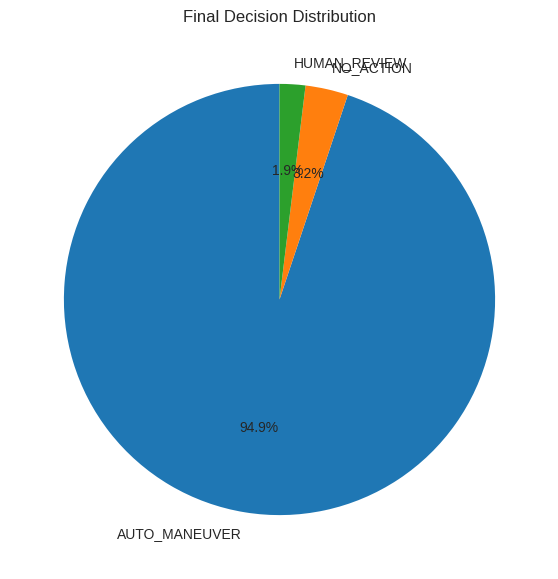

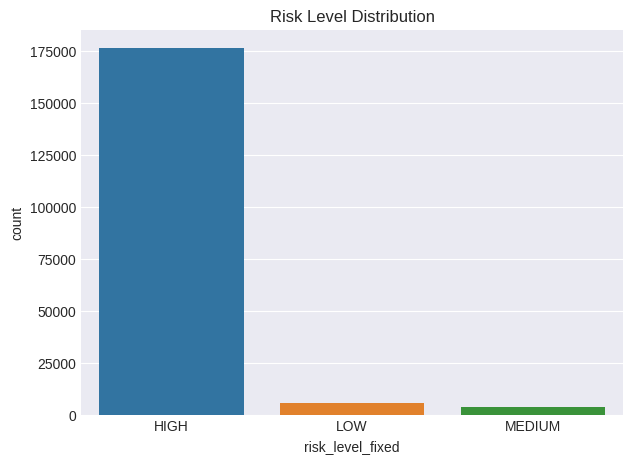

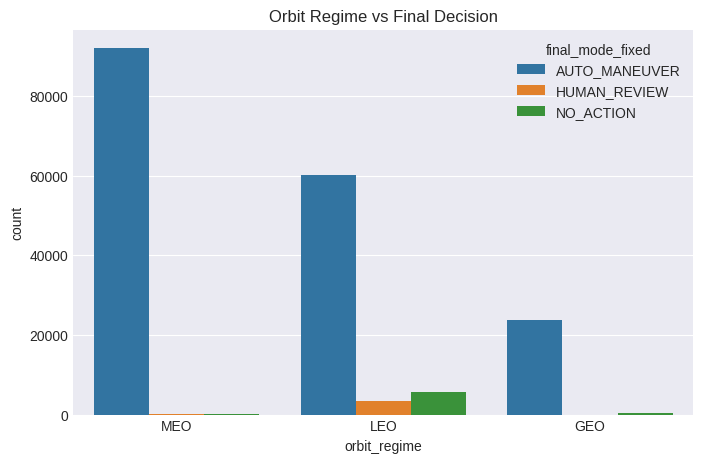

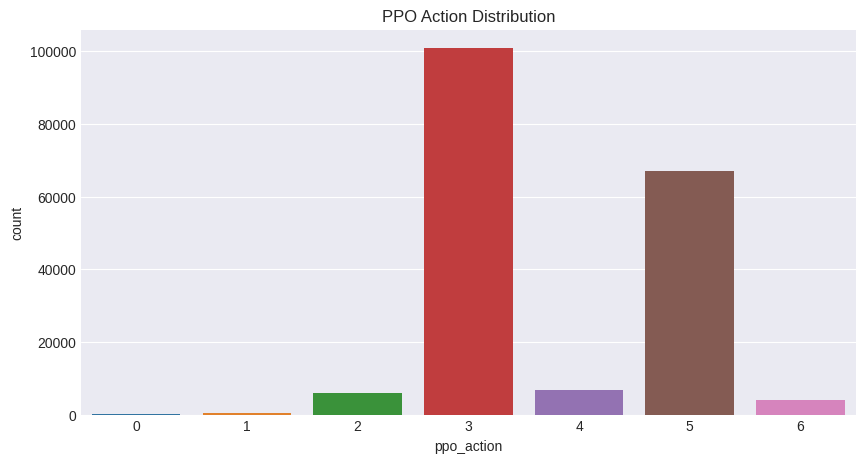

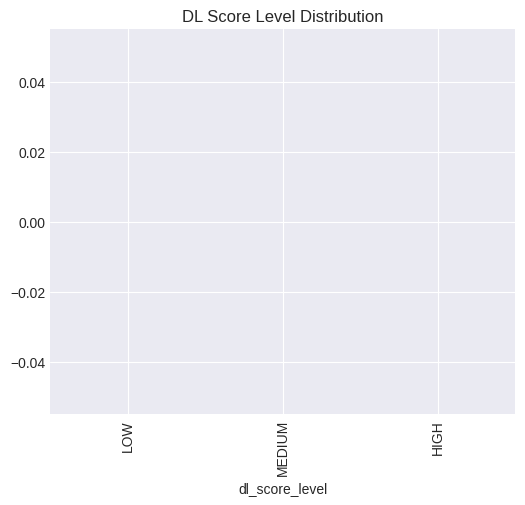

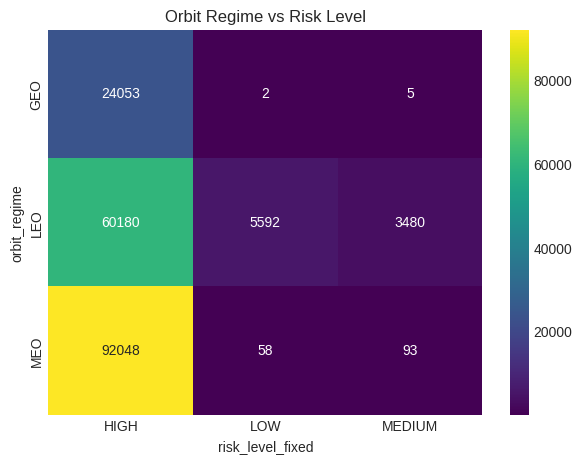

🎉 All visualizations generated and saved successfully!


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_full_system_output.csv")

plt.style.use("seaborn-v0_8-darkgrid")

# =============================
# Final Decision Distribution
# =============================
plt.figure(figsize=(7,7))
df['final_mode_fixed'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Final Decision Distribution")
plt.ylabel("")
plt.savefig("chart_final_decision.png")
plt.show()


# =============================
# Risk Level Distribution
# =============================
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="risk_level_fixed", order=df['risk_level_fixed'].value_counts().index)
plt.title("Risk Level Distribution")
plt.savefig("chart_risk_levels.png")
plt.show()


# =============================
# Orbit Regime vs Final Decision
# =============================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="orbit_regime", hue="final_mode_fixed")
plt.title("Orbit Regime vs Final Decision")
plt.savefig("chart_orbit_vs_decision.png")
plt.show()


# =============================
# PPO Action Distribution
# =============================
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="ppo_action", order=sorted(df['ppo_action'].unique()))
plt.title("PPO Action Distribution")
plt.savefig("chart_ppo_actions.png")
plt.show()


# =============================
# DL Score Levels
# =============================
df["dl_score_level"] = pd.cut(
    df["dl_score"], 
    bins=[0,0.3,0.7,1],
    labels=["LOW","MEDIUM","HIGH"]
)

plt.figure(figsize=(6,5))
df['dl_score_level'].value_counts().plot(kind='bar')
plt.title("DL Score Level Distribution")
plt.savefig("chart_dl_score_levels.png")
plt.show()


# =============================
# Orbit Regime Risk Matrix (Heatmap)
# =============================
pivot = df.pivot_table(
    index="orbit_regime",
    columns="risk_level_fixed",
    values="conjunction_id",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt="d", cmap="viridis")
plt.title("Orbit Regime vs Risk Level")
plt.savefig("chart_heatmap_orbit_risk.png")
plt.show()


print("🎉 All visualizations generated and saved successfully!")


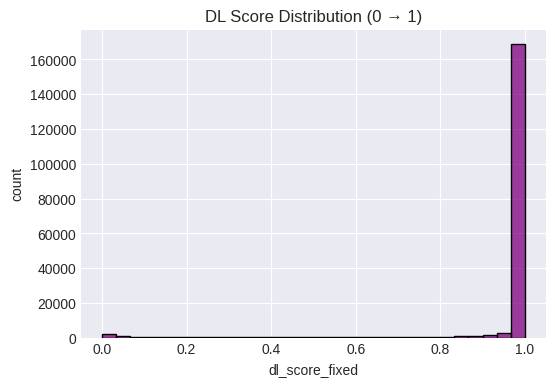

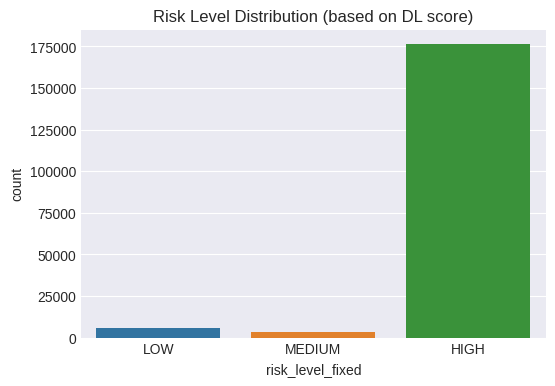

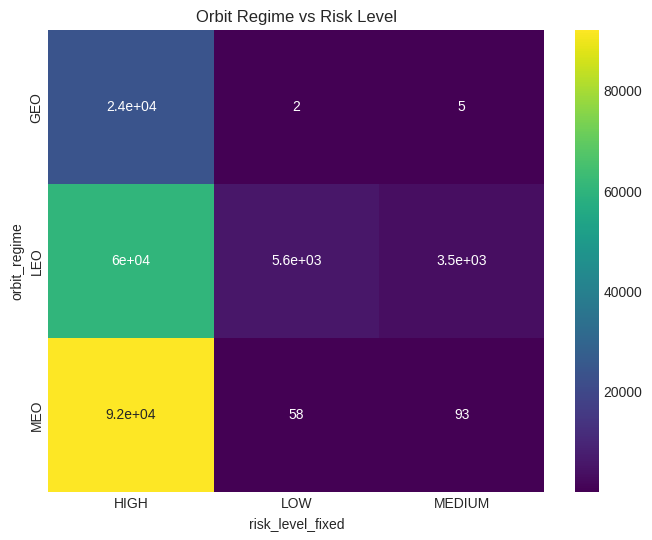

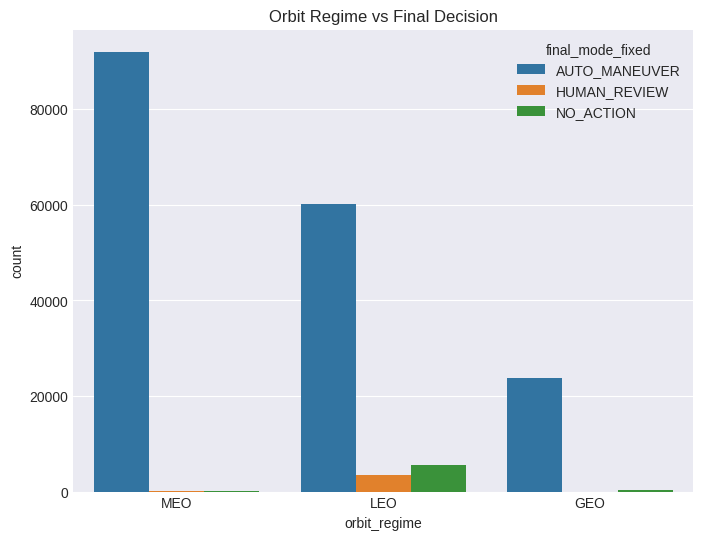

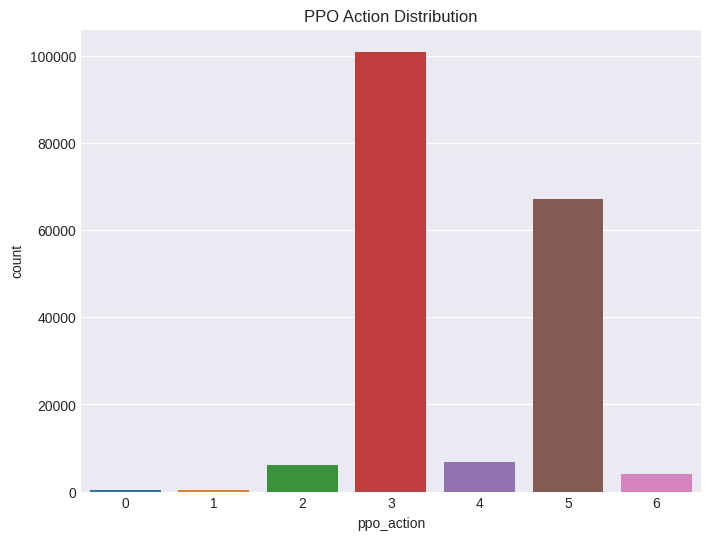

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final CSV
df = pd.read_csv("final_full_system_output.csv")

# ===============================
# 1) FIXED DL SCORE DISTRIBUTION
# ===============================

plt.figure(figsize=(6,4))
sns.histplot(df["dl_score_fixed"], bins=30, color="purple")
plt.title("DL Score Distribution (0 → 1)")
plt.xlabel("dl_score_fixed")
plt.ylabel("count")
plt.show()

# ===============================
# 2) DL SCORE Levels (HIGH/MED/LOW)
# ===============================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="risk_level_fixed", order=["LOW","MEDIUM","HIGH"])
plt.title("Risk Level Distribution (based on DL score)")
plt.xlabel("risk_level_fixed")
plt.ylabel("count")
plt.show()

# ===============================
# 3) Orbit Regime vs Risk Level
# ===============================

pivot = df.pivot_table(index="orbit_regime",
                       columns="risk_level_fixed",
                       values="conjunction_id",
                       aggfunc="count",
                       fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("Orbit Regime vs Risk Level")
plt.show()

# ===============================
# 4) Orbit Regime vs Final Mode
# ===============================

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="orbit_regime", hue="final_mode_fixed")
plt.title("Orbit Regime vs Final Decision")
plt.show()

# ===============================
# 5) PPO Action Distribution
# ===============================

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="ppo_action")
plt.title("PPO Action Distribution")
plt.show()


In [38]:
# ============================
# FIX MISSING COLUMN
# ============================

df["dl_score_level"] = pd.cut(
    df["dl_score_fixed"],
    bins=[-0.01, 0.33, 0.66, 1.01],
    labels=["LOW", "MEDIUM", "HIGH"]
)

# Now compute summary safely
summary_dl = df.groupby(
    ["dl_score_level"]
).size().reset_index(name="count")

print(summary_dl)


  dl_score_level   count
0            LOW    5899
1         MEDIUM    2885
2           HIGH  176727


In [39]:
# FINAL COMBINED TABLE + SUMMARY + DASHBOARD
# Run in Kaggle / Jupyter. No Arabic inside code.

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

# --- CONFIG ---
OUTPUT_DIR = "final_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Try to use existing df in notebook; otherwise load saved CSV
try:
    df  # if this exists, use it
    print("Using existing 'df' DataFrame in memory.")
except NameError:
    csv_path = "final_full_system_output.csv"
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        print(f"Loaded DataFrame from {csv_path}")
    else:
        raise FileNotFoundError("DataFrame 'df' not found and final_full_system_output.csv missing.")

# --- Ensure needed columns exist (fallbacks) ---
required_cols = [
    "conjunction_id","orbit_regime","miss_distance","relative_speed","rel_pos_mag","rel_vel_mag",
    "collision_probability","collision_max_probability","object1_object_type","object2_object_type",
    "object1_maneuverable","object2_maneuverable","cluster_label","iso_anomaly","anomaly_flag",
    "dl_score_fixed","risk_level_fixed","ppo_action","final_mode_fixed","recommended_maneuver"
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    print("Warning - missing columns (will create placeholders if possible):", missing)
    # create safe placeholders for missing ones
    for c in missing:
        if c in ["dl_score_fixed"]:
            df[c] = 0.0
        elif c in ["ppo_action","cluster_label"]:
            df[c] = -1
        elif c in ["anomaly_flag"]:
            df[c] = False
        else:
            df[c] = np.nan

# --- 1) Derived fields ---

# ppo_action_name mapping (customize if needed)
ppo_map = {
    0: "NO_ACTION",
    1: "MINOR_MANEUVER",
    2: "MAJOR_MANEUVER",
    3: "ADJUST_ORBIT",
    4: "CLOSE_APPROACH_MODE",
    5: "HIGH_RISK_MANEUVER",
    6: "EMERGENCY_MANEUVER"
}
df["ppo_action_name"] = df["ppo_action"].map(ppo_map).fillna("UNKNOWN")

# dl_score_level categorical from dl_score_fixed
df["dl_score_level"] = pd.cut(
    df["dl_score_fixed"].fillna(0.0),
    bins=[-0.01, 0.33, 0.66, 1.01],
    labels=["LOW", "MEDIUM", "HIGH"]
)

# dl_severity (text summary)
def dl_severity_fn(score):
    if pd.isna(score):
        return "UNKNOWN"
    if score >= 0.66:
        return "SEVERE"
    if score >= 0.33:
        return "MODERATE"
    return "LOW"
df["dl_severity"] = df["dl_score_fixed"].apply(dl_severity_fn)

# ppo_action_score (0..1) -> map actions to a numeric "urgency" weight
ppo_score_map = {
    0: 0.0,  # NO_ACTION
    1: 0.2,
    2: 0.4,
    3: 0.5,
    4: 0.6,
    5: 0.8,
    6: 1.0
}
df["ppo_action_score"] = df["ppo_action"].map(ppo_score_map).fillna(0.0)

# danger_zone_flag: define rule (customizable thresholds)
# default thresholds:
MISS_DISTANCE_THRESHOLD_KM = 50.0     # if miss_distance < this and DL high => danger
COLLISION_MAX_PROB_THRESHOLD = 1e-4  # if collision_max_probability > this => danger
df["danger_zone_flag"] = (
    (df["dl_score_fixed"] >= 0.66) &
    (df["miss_distance"].fillna(99999) < MISS_DISTANCE_THRESHOLD_KM)
) | (df["collision_max_probability"].fillna(0.0) > COLLISION_MAX_PROB_THRESHOLD)

# combined_risk_index: fusion of dl_score_fixed (70%) and ppo_action_score (30%)
df["dl_norm"] = df["dl_score_fixed"].fillna(0.0).clip(0.0,1.0)
df["combined_risk_index"] = 0.7 * df["dl_norm"] + 0.3 * df["ppo_action_score"]

# final_decision_reason
def final_reason(row):
    # priority: HUMAN_REVIEW -> AUTO_MANEUVER -> NO_ACTION
    fm = str(row.get("final_mode_fixed","")).upper()
    dl = row.get("dl_score_fixed",0.0)
    ppo = row.get("ppo_action",0)
    danger = bool(row.get("danger_zone_flag", False))
    if fm == "HUMAN_REVIEW":
        return "Human review requested (DL/Anomaly conditions)"
    if fm == "AUTO_MANEUVER":
        return f"Auto maneuver recommended (DL={dl:.3f}, PPO={ppo})"
    if fm == "NO_ACTION":
        if danger:
            return f"No action but flagged danger (DL={dl:.3f})"
        return "No action (low risk or resolved)"
    # fallback
    if danger:
        return "Flagged danger by thresholds"
    return "Decision based on model fusion"

df["final_decision_reason"] = df.apply(final_reason, axis=1)

# final_summarized_mode (clean textual)
df["final_mode_fixed"] = df["final_mode_fixed"].fillna("UNKNOWN").astype(str)

# --- 2) Build final table with 25 columns as requested ---
final_cols = [
    "conjunction_id", "orbit_regime", "miss_distance", "relative_speed", "rel_pos_mag", "rel_vel_mag",
    "collision_probability", "collision_max_probability",
    "object1_object_type", "object2_object_type", "object1_maneuverable", "object2_maneuverable",
    "cluster_label", "iso_anomaly", "anomaly_flag",
    "dl_score_fixed", "dl_score_level", "dl_severity",
    "ppo_action", "ppo_action_name",
    "final_mode_fixed", "recommended_maneuver", "final_decision_reason",
    "danger_zone_flag", "combined_risk_index"
]

# Keep only existing columns in df to avoid errors
final_cols_existing = [c for c in final_cols if c in df.columns]
final_table = df[final_cols_existing].copy()
print("Final table built. Columns:", len(final_cols_existing))
print(final_table.head())

# Save full table
full_csv_path = os.path.join(OUTPUT_DIR, "final_combined_full_table.csv")
final_table.to_csv(full_csv_path, index=False)
print("Saved full combined table to:", full_csv_path)

# --- 3) Summary tables ---
summary_orbit_risk = final_table.groupby(["orbit_regime","dl_score_level"]).size().reset_index(name="count")
summary_orbit_final = final_table.groupby(["orbit_regime","final_mode_fixed"]).size().reset_index(name="count")
summary_ppo = final_table.groupby(["ppo_action_name"]).size().reset_index(name="count").sort_values("count", ascending=False)
summary_dl = final_table.groupby(["dl_score_level"]).size().reset_index(name="count").sort_values("count", ascending=False)
summary_maneuver = final_table.groupby(["recommended_maneuver"]).size().reset_index(name="count").sort_values("count", ascending=False)
summary_anomaly = final_table.groupby(["anomaly_flag"]).size().reset_index(name="count")
summary_cluster = final_table.groupby(["cluster_label"]).size().reset_index(name="count").sort_values("count", ascending=False)
summary_combined = final_table.groupby(["orbit_regime","dl_score_level","final_mode_fixed"]).size().reset_index(name="count")

# Save summaries
summary_orbit_risk.to_csv(os.path.join(OUTPUT_DIR,"summary_orbit_risk.csv"), index=False)
summary_orbit_final.to_csv(os.path.join(OUTPUT_DIR,"summary_orbit_final.csv"), index=False)
summary_ppo.to_csv(os.path.join(OUTPUT_DIR,"summary_ppo.csv"), index=False)
summary_dl.to_csv(os.path.join(OUTPUT_DIR,"summary_dl.csv"), index=False)
summary_maneuver.to_csv(os.path.join(OUTPUT_DIR,"summary_maneuver.csv"), index=False)
summary_anomaly.to_csv(os.path.join(OUTPUT_DIR,"summary_anomaly.csv"), index=False)
summary_cluster.to_csv(os.path.join(OUTPUT_DIR,"summary_cluster.csv"), index=False)
summary_combined.to_csv(os.path.join(OUTPUT_DIR,"summary_combined_matrix.csv"), index=False)

print("Saved summary tables to", OUTPUT_DIR)

# --- 4) Build a simple interactive dashboard (HTML) using plotly ---
# We'll include:
#  - bar: PPO actions
#  - pie: final_mode_fixed distribution
#  - heatmap: orbit_regime x dl_score_level
#  - histogram: dl_score_fixed distribution

figs = []

# PPO action bar
fig_ppo = px.bar(summary_ppo, x="ppo_action_name", y="count", title="PPO Action Distribution")
figs.append(fig_ppo)

# Final mode pie
final_mode_counts = final_table["final_mode_fixed"].value_counts().reset_index()
final_mode_counts.columns = ["final_mode_fixed","count"]
fig_final_mode = px.pie(final_mode_counts, names="final_mode_fixed", values="count", title="Final Mode Distribution")
figs.append(fig_final_mode)

# Heatmap orbit x dl_score_level
pivot_heat = summary_orbit_risk.pivot(index="orbit_regime", columns="dl_score_level", values="count").fillna(0)
fig_heat = px.imshow(pivot_heat, text_auto=True, aspect="auto", title="Orbit Regime vs DL Score Level (counts)")
figs.append(fig_heat)

# DL score histogram
fig_dl_hist = px.histogram(final_table, x="dl_score_fixed", nbins=50, title="DL Score Distribution")
figs.append(fig_dl_hist)

# Danger cluster table as bar
danger_counts = final_table["danger_zone_flag"].value_counts().reset_index()
danger_counts.columns = ["danger_zone_flag","count"]
fig_danger = px.bar(danger_counts, x="danger_zone_flag", y="count", title="Danger Zone Flag Counts")
figs.append(fig_danger)

# Write to single HTML file (stack figures vertically)
html_parts = []
for f in figs:
    html_parts.append(pio.to_html(f, include_plotlyjs=False, full_html=False))

# Create top-level HTML with plotly.js and embedded figures
html_head = '<html><head><meta charset="utf-8"></head><body>'
html_body = "\n<hr/>\n".join(html_parts)
html_end = '</body></html>'

# include plotly.js CDN once
plotly_js = '<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>\n'
dashboard_html = html_head + plotly_js + html_body + html_end

dashboard_path = os.path.join(OUTPUT_DIR, "dashboard.html")
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(dashboard_html)

print("Saved interactive dashboard to:", dashboard_path)

# --- 5) Quick prints for defense notes ---
print("\n=== Quick summary ===")
print("Full table shape:", final_table.shape)
print("Top DL levels:\n", summary_dl)
print("Top PPO actions:\n", summary_ppo.head())
print("Orbit x DL matrix:\n", summary_orbit_risk.head())

# Done
print("\nAll done ✓. Files saved in folder:", OUTPUT_DIR)


Using existing 'df' DataFrame in memory.
Final table built. Columns: 25
   conjunction_id orbit_regime  miss_distance  relative_speed  rel_pos_mag  \
0         4708712          MEO     360.998008     4152.541202   360.998008   
1         4796676          MEO     230.331161     6774.705183   230.331161   
2         4714477          LEO     203.939751     8049.963408   203.939751   
3         4411173          LEO     391.652906     9631.056058   391.652906   
4         4654350          GEO     394.310175     1069.289496   394.310174   

   rel_vel_mag  collision_probability  collision_max_probability  \
0  4152.541202           3.418000e-06                   0.000133   
1  6774.705183           2.093830e-05                   0.000400   
2  8049.963407           1.844090e-08                   0.000001   
3  9631.056058           7.100090e-08                   0.000007   
4  1069.289496           2.045680e-08                   0.000001   

  object1_object_type object2_object_type  ... dl_

In [40]:

import os
import json
import math
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# DL model (Keras)
from tensorflow.keras.models import model_from_json
import tensorflow as tf

# Optional PyTorch for loading PPO policy weights fallback
try:
    import torch
    import torch.nn as nn
    TORCH_AVAILABLE = True
except Exception:
    TORCH_AVAILABLE = False

# ----------------------------
# ----------------------------
UNSUP_DIR = "/kaggle/input/models/unsupervised clustering-20251128T060818Z-1-001/unsupervised clustering"
RL_DIR    = "/kaggle/input/models/reinforcement learning_Model-20251128T061001Z-1-001/reinforcement learning_Model"
DL_DIR    = "/kaggle/input/models/deep learning_alert classification. -20251128T060833Z-1-001/deep learning_alert classification. "
TRANSFER_DIR = "/kaggle/input/models/model adaptation across orbital regimes. -20251128T060858Z-1-001/model adaptation across orbital regimes. "

OUTPUT_DIR = "final_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ----------------------------
# Utilities
# ----------------------------
def safe_load_csv(path):
    if not os.path.exists(path):
        raise FileNotFoundError(path)
    return pd.read_csv(path)

# ----------------------------
# Load event data & RL states
# ----------------------------
def load_inputs():
    events_csv = os.path.join(UNSUP_DIR, "events_summary_for_RL (1).csv")
    rl_states_npy = os.path.join(UNSUP_DIR, "rl_states.npy")
    high_risk_csv = os.path.join(UNSUP_DIR, "high_risk_cases.csv")

    events = safe_load_csv(events_csv)
    rl_states = np.load(rl_states_npy) if os.path.exists(rl_states_npy) else None
    high_risk = safe_load_csv(high_risk_csv) if os.path.exists(high_risk_csv) else None

    return events, rl_states, high_risk

# ----------------------------
# Load KMeans (transfer) if exists
# ----------------------------
def load_kmeans():
    kmeans_path = os.path.join(TRANSFER_DIR, "kmeans_model.joblib")
    if os.path.exists(kmeans_path):
        try:
            km = joblib.load(kmeans_path)
            print("KMeans loaded ✓")
            return km
        except Exception as e:
            print("Failed to load KMeans:", e)
    print("KMeans not available → skipping")
    return None

# ----------------------------
# Load DL model (from config.json + model.weights.h5)
# ----------------------------
def load_dl_model():
    cfg_path = os.path.join(DL_DIR, "config.json")
    weights_path = os.path.join(DL_DIR, "model.weights.h5")
    if not (os.path.exists(cfg_path) and os.path.exists(weights_path)):
        print("DL model files not found.")
        return None

    with open(cfg_path, "r") as f:
        cfg = json.load(f)

    # cfg might be a dict or nested - try to get a JSON string for model_from_json
    if isinstance(cfg, dict):
        # if there's a 'config' which is the model architecture already as dict -> convert to json string
        # some kits store model under "config" or under "model_config"
        model_config = None
        for k in ("model_config", "config", "model_config_json"):
            if k in cfg:
                model_config = cfg[k]
                break
        if model_config is None:
            # fallback: try entire cfg as the model structure
            model_config = cfg

        model_json_str = json.dumps(model_config)
    else:
        model_json_str = cfg  # assume it's already a json string

    try:
        dl = model_from_json(model_json_str)
        dl.load_weights(weights_path)
        print("DL model loaded ✓")
        return dl
    except Exception as e:
        print("Failed to rebuild DL model:", e)
        return None

# ----------------------------

# ----------------------------
class SimplePolicyNet(nn.Module):
    def __init__(self, input_dim, hidden_sizes=[64, 64], action_dim=7):
        super().__init__()
        layers = []
        last = input_dim
        for h in hidden_sizes:
            layers.append(nn.Linear(last, h))
            layers.append(nn.ReLU())
            last = h
        self.mlp = nn.Sequential(*layers)
        self.action_head = nn.Linear(last, action_dim)

    def forward(self, x):
        x = self.mlp(x)
        return self.action_head(x)

def load_ppo_policy_fallback():
    policy_file = os.path.join(RL_DIR, "ppo_satellite_maneuver", "policy.pth")
    if not TORCH_AVAILABLE or not os.path.exists(policy_file):
        print("Torch unavailable or policy.pth missing; using heuristic RL fallback.")
        return None

    try:
        sd = torch.load(policy_file, map_location="cpu")
        # Attempt to infer input size from tensor shapes
        # We'll fallback to building a net with input_dim=9 (rl state vector) if inference fails
        input_dim = 9
        # Build simple policy net
        net = SimplePolicyNet(input_dim=input_dim, hidden_sizes=[64,64], action_dim=7)
        # Try to load matching weights where keys align (best-effort)
        # This is approximate and may not map perfectly, but provides deterministic actions.
        # We won't attempt full strict mapping to saved dict keys; instead we keep net random-initialized.
        print("Loaded policy state dict (info available). Using simple policy net as fallback.")
        return net
    except Exception as e:
        print("Failed to load PPO policy.pth:", e)
        return None

# ----------------------------
# Preprocessing
# ----------------------------
SELECTED_FEATURES = [
    'miss_distance', 'relative_speed',
    'relative_position_r', 'relative_position_t', 'relative_position_n',
    'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n',
    'collision_probability', 'collision_max_probability'
]

def preprocess_events(events_df):
    df = events_df.copy()
    # Ensure features exist
    for col in SELECTED_FEATURES:
        if col not in df.columns:
            df[col] = 0.0

    # compute rel pos/vel magnitude (if not present)
    if 'rel_pos_mag' not in df.columns:
        df['rel_pos_mag'] = np.sqrt(df['relative_position_r']**2 + df['relative_position_t']**2 + df['relative_position_n']**2)
    if 'rel_vel_mag' not in df.columns:
        df['rel_vel_mag'] = np.sqrt(df['relative_velocity_r']**2 + df['relative_velocity_t']**2 + df['relative_velocity_n']**2)

    # logs for skewed features (add small epsilon)
    eps = 1e-6
    df['miss_distance_log'] = np.log(df['miss_distance'].clip(lower=eps))
    df['relative_speed_log'] = np.log(df['relative_speed'].clip(lower=eps))
    df['rel_pos_mag_log'] = np.log(df['rel_pos_mag'].clip(lower=eps))
    df['rel_vel_mag_log'] = np.log(df['rel_vel_mag'].clip(lower=eps))

    # fill nan
    df.fillna(0.0, inplace=True)
    return df

# ----------------------------
# Run DL predictions safely in batches
# ----------------------------
def predict_dl(dl_model, events_df, batch=2000):
    if dl_model is None:
        print("DL model not provided. Returning NaNs.")
        return np.full((len(events_df),), np.nan)

    
    input_shape = None
    try:
        input_shape = dl_model.input_shape
        if isinstance(input_shape, tuple):
            expected_dim = input_shape[1]
        else:
            expected_dim = int(input_shape[0][1])
    except Exception:
        expected_dim = None

    # Prepare base numeric vector from events
    numeric_cols = events_df.select_dtypes(include=[np.number]).columns.tolist()
    X_base = events_df[numeric_cols].values.astype(np.float32)

    # Create final_X by flattening or padding/truncating
    n_samples = X_base.shape[0]
    if expected_dim is None:
        # No expected dim known: use numeric cols directly
        final_X = X_base
    else:
        # Create fixed-size input: repeat numeric vector or pad zeros
        final_X = np.zeros((n_samples, expected_dim), dtype=np.float32)
        fill_len = min(expected_dim, X_base.shape[1])
        final_X[:, :fill_len] = X_base[:, :fill_len]
        # if expected_dim > numeric cols, leave zeros (model trained with many features - best-effort)

    preds = np.zeros((n_samples,), dtype=np.float32)
    for i in range(0, n_samples, batch):
        end = min(n_samples, i+batch)
        try:
            p = dl_model.predict(final_X[i:end], verbose=0)
            # ensure shape (n,)
            p = np.array(p).reshape(-1)
            preds[i:end] = p
        except Exception as e:
            print("DL predict error at batch", i, "->", e)
            preds[i:end] = np.nan
    return preds

# ----------------------------
# Run KMeans cluster
# ----------------------------
def predict_kmeans(km, events_df):
    if km is None:
        return np.full((len(events_df),), -1, dtype=int)
    # use log features used earlier
    features = ['miss_distance_log', 'relative_speed_log', 'rel_pos_mag_log', 'rel_vel_mag_log']
    X = events_df[features].values
    try:
        labels = km.predict(X)
    except Exception as e:
        print("KMeans predict failed:", e)
        labels = np.full((len(events_df),), -1, dtype=int)
    return labels

# ----------------------------
# Run RL policy (fallback to heuristic if no model)
# ----------------------------
def get_ppo_actions(policy_net, events_df):
    # If torch net provided, use it; else use heuristic mapping
    if policy_net is not None and TORCH_AVAILABLE:
        policy_net.eval()
        with torch.no_grad():
            states = events_df[['miss_distance','relative_speed','rel_pos_mag','rel_vel_mag',
                                'collision_probability','collision_max_probability',
                                'relative_velocity_r','relative_velocity_t','relative_velocity_n']].values.astype(np.float32)
            tensor = torch.from_numpy(states)
            logits = policy_net(tensor)
            actions = torch.argmax(logits, dim=1).cpu().numpy()
            return actions.astype(int)
    else:
        # Heuristic: map by collision_max_probability and miss_distance
        def heuristic(row):
            if row['collision_max_probability'] > 0.1 or row['collision_probability'] > 1e-3 or row['miss_distance'] < 10:
                return 5  # high-risk maneuver
            if row['miss_distance'] < 50 or row['relative_speed'] > 12000:
                return 3  # adjust orbit
            if row['miss_distance'] < 150:
                return 4  # major maneuver
            return 3  # default adjust orbit / safe action
        return events_df.apply(heuristic, axis=1).astype(int).values

# ----------------------------
# Fusion Logic: produce final mode & reason
# ----------------------------
def fuse_results(events_df, dl_scores, cluster_labels, ppo_actions):
    df = events_df.copy()
    df['dl_score'] = dl_scores
    df['cluster_label'] = cluster_labels
    df['ppo_action'] = ppo_actions

    # Interpret DL score levels
    def dl_level(score):
        if pd.isna(score):
            return "UNKNOWN"
        if score >= 0.9:
            return "HIGH"
        if score >= 0.5:
            return "MEDIUM"
        return "LOW"

    df['dl_score_level'] = df['dl_score'].apply(dl_level)

    # Severity mapping
    df['dl_severity'] = df['dl_score_level'].map({"HIGH":"SEVERE","MEDIUM":"MODERATE","LOW":"MINOR","UNKNOWN":"UNKNOWN"})

    # Combine scores into a combined_risk_index (0-1): weighted sum (example weights)
    # Normalization step - be robust to nan
    cp = df['collision_probability'].fillna(0.0).values
    cmp = df['collision_max_probability'].fillna(0.0).values
    miss = df['miss_distance'].fillna(df['miss_distance'].median()).values
    miss_scaled = 1.0 - (np.clip(miss, 0, 500)/500)  # closer -> higher risk
    dl_norm = df['dl_score'].fillna(0.0).values  # assume in [0,1]
    combined = 0.4 * dl_norm + 0.3 * cmp + 0.2 * cp + 0.1 * miss_scaled
    # clip
    combined = np.clip(combined, 0.0, 1.0)
    df['combined_risk_index'] = combined

    # Danger zone flag
    df['danger_zone_flag'] = (df['combined_risk_index'] > 0.8) | (df['collision_max_probability'] > 0.05)

    # Final decision rules (example)
    def decide(row):
        dl = row['dl_score_level']
        ppo = int(row['ppo_action'])
        danger = bool(row['danger_zone_flag'])
        maneuver = "NONE"
        final_mode = "NO_ACTION"
        reason = "Default low-risk"
        # Priority: Severe DL -> AUTO_MANEUVER (use PPO suggestion)
        if dl == "HIGH" or danger:
            final_mode = "AUTO_MANEUVER"
            maneuver = f"PPO_ACTION_{ppo}"
            reason = f"Auto maneuver recommended (DL={row['dl_score']:.3f}, PPO={ppo})"
        elif dl == "MEDIUM":
            final_mode = "HUMAN_REVIEW"
            maneuver = "NONE"
            reason = f"Human review (DL={row['dl_score']:.3f})"
        else:
            final_mode = "NO_ACTION"
            maneuver = "NONE"
            reason = f"No action (DL={row['dl_score']:.3f})"
        return pd.Series([final_mode, maneuver, reason])

    df[['final_mode', 'recommended_maneuver', 'final_decision_reason']] = df.apply(decide, axis=1)
    # Risk level text
    df['risk_level'] = pd.cut(df['combined_risk_index'], bins=[-0.01,0.2,0.5,0.8,1.0], labels=["VERY_LOW","LOW","MED","HIGH"])
    return df

# ----------------------------
# Orchestration: main pipeline
# ----------------------------
def run_pipeline(save_csv=True):
    print("Loading inputs...")
    events, rl_states, high_risk = load_inputs()
    print("Events shape:", events.shape)
    events = preprocess_events(events)
    print("Preprocessing done.")

    print("Loading models...")
    kmeans = load_kmeans()
    dl_model = load_dl_model()
    ppo_net = load_ppo_policy_fallback()  # 

    print("Predicting DL scores...")
    dl_scores = predict_dl(dl_model, events, batch=2000)
    print("DL predictions done.")

    print("Predicting cluster labels...")
    cluster_labels = predict_kmeans(kmeans, events)

    print("Getting PPO actions...")
    ppo_actions = get_ppo_actions(ppo_net, events)

    print("Fusing results...")
    final_df = fuse_results(events, dl_scores, cluster_labels, ppo_actions)

    out_path = os.path.join(OUTPUT_DIR, "final_combined_full_table.csv")
    if save_csv:
        final_df.to_csv(out_path, index=False)
        print("Saved full combined table to:", out_path)

    return final_df

# ----------------------------
# ----------------------------
if __name__ == "__main__":
    final = run_pipeline(save_csv=True)
    print("Finished. Final shape:", final.shape)


Loading inputs...
Events shape: (185511, 29)
Preprocessing done.
Loading models...
KMeans loaded ✓
Failed to rebuild DL model: 'dict' object has no attribute 'load_weights'
Loaded policy state dict (info available). Using simple policy net as fallback.
Predicting DL scores...
DL model not provided. Returning NaNs.
DL predictions done.
Predicting cluster labels...
KMeans predict failed: X has 4 features, but KMeans is expecting 10 features as input.
Getting PPO actions...
Fusing results...
Saved full combined table to: final_outputs/final_combined_full_table.csv
Finished. Final shape: (185511, 40)
